In [1]:
# ! pip install -r requirements.txt

## Pre-procesamiento

Se realiza una exploración inicial y pre-procesamiento de los datos a analizar:

In [2]:
import itertools
import re

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib.ticker import FuncFormatter
from pandas.api.types import CategoricalDtype
from scipy.stats import expon

In [3]:
url ='https://raw.githubusercontent.com/DiploDatos/AnalisisyVisualizacion/master/sysarmy_survey_2022_processed.csv'
df = pd.read_csv(url)
df.head()

,work_country,work_province,work_dedication,work_contract_type,salary_monthly_BRUTO,salary_monthly_NETO,numero,salary_in_usd,salary_last_dollar_value,salary_pay_cripto,...,profile_studies_level_state,profile_career,profile_university,profile_boot_camp,profile_boot_camp_carrer,work_on_call_duty,salary_on_call_duty_charge,work_on_call_duty_charge_type,profile_age,profile_gender
0,Argentina,Catamarca,Full-Time,Staff (planta permanente),300000.0,245000.0,True,NaN,NaN,NaN,...,Completo,Licenciatura en redes y comunicación de datos,UP - Universidad de Palermo,NaN,NaN,NaN,NaN,NaN,35,Varón Cis
1,Argentina,Chaco,Full-Time,Remoto (empresa de otro país),900000.0,850000.0,True,Cobro todo el salario en dólares,300,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,31,Varón Cis
2,Argentina,Chaco,Full-Time,Staff (planta permanente),120000.0,115000.0,True,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,27,Varón Cis
3,Argentina,Chaco,Full-Time,Remoto (empresa de otro país),440000.0,0.0,True,Cobro todo el salario en dólares,220,Cobro todo el salario criptomonedas,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,21,Varón Cis
4,Argentina,Chaco,Full-Time,Staff (planta permanente),140000.0,125000.0,True,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,32,Varón Cis


In [4]:
pd.set_option('display.float_format', lambda x: '%.5f' % x)  # suppress scientific notation 

In [5]:
df.describe(include='all')

,work_country,work_province,work_dedication,work_contract_type,salary_monthly_BRUTO,salary_monthly_NETO,numero,salary_in_usd,salary_last_dollar_value,salary_pay_cripto,...,profile_studies_level_state,profile_career,profile_university,profile_boot_camp,profile_boot_camp_carrer,work_on_call_duty,salary_on_call_duty_charge,work_on_call_duty_charge_type,profile_age,profile_gender
count,5358,5358,5358,5358,5358.00000,5358.00000,5358,1640,1063,161,...,2659,2556,2502,693,437,1718,1718.00000,1718,5358.00000,5358
unique,1,24,2,5,NaN,NaN,1,3,359,2,...,3,391,450,215,290,3,NaN,3,NaN,14
top,Argentina,Ciudad Autónoma de Buenos Aires,Full-Time,Staff (planta permanente),NaN,NaN,True,Cobro parte del salario en dólares,130,Cobro todo el salario criptomonedas,...,Completo,Ingeniería en Sistemas de Información,UTN - Universidad Tecnológica Nacional,No,no,No,NaN,Porcentaje de mi sueldo bruto,NaN,Varón Cis
freq,5358,2699,5106,4068,NaN,NaN,5358,663,50,100,...,1204,452,586,185,38,1166,NaN,1064,NaN,3902
mean,NaN,NaN,NaN,NaN,363510.54282,277010.78680,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,2206.67369,NaN,33.27940,NaN
std,NaN,NaN,NaN,NaN,543925.45885,401942.29874,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,17389.85329,NaN,7.92473,NaN
min,NaN,NaN,NaN,NaN,0.00000,0.00000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.00000,NaN,18.00000,NaN
25%,NaN,NaN,NaN,NaN,150000.00000,118612.18750,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.00000,NaN,27.00000,NaN
50%,NaN,NaN,NaN,NaN,256000.00000,201000.00000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.00000,NaN,32.00000,NaN
75%,NaN,NaN,NaN,NaN,412657.00000,294000.00000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.00000,NaN,38.00000,NaN


In [6]:
df.columns

Index(['work_country', 'work_province', 'work_dedication',
       'work_contract_type', 'salary_monthly_BRUTO', 'salary_monthly_NETO',
       'numero', 'salary_in_usd', 'salary_last_dollar_value',
       'salary_pay_cripto', 'salary_%_cripto', 'salary_has_bonus',
       'salary_bonus_tied_to', 'salary_inflation_adjustment',
       'salary_percentage_inflation_adjustment',
       'salary_month_last_inflation_adjustment',
       'salary_comparison_last_semester', 'salary_benefit',
       'salary_satisfaction', 'Trabajo de', 'profile_years_experience',
       'work_years_in_company', 'work_years_in_current_position',
       'work_people_in_charge_of', 'tools_platform',
       'tools_programming_languages', 'tools_frameworks', 'tools_data_bases',
       'tools_qa_testing', 'company_employee_number', 'work_work_modality',
       'Si trabajas bajo un esquema híbrido ¿Cuántos días a la semana vas a la oficina?',
       'company_recommended', 'profile_studies_level',
       'profile_studies_le

Se renombran algunas columnas a fin de acceder a cada columna con la sintaxis de un método del objeto `DataFrae` y de acercar el código a las buenas prácticas de programación con Python:

In [7]:
df = df.rename(columns = {
    'salary_monthly_BRUTO': 'monthly_gross_salary',
    'salary_monthly_NETO': 'monthly_net_salary',
    'salary_%_cripto': 'crypto_salary_percentage',
    'Trabajo de': 'role',
    'Si trabajas bajo un esquema híbrido ¿Cuántos días a la semana vas a la oficina?': 'hybrid_office_days_per_week',
    'profile_studies_level': 'profile_level_study',
})

In [8]:
df.columns

Index(['work_country', 'work_province', 'work_dedication',
       'work_contract_type', 'monthly_gross_salary', 'monthly_net_salary',
       'numero', 'salary_in_usd', 'salary_last_dollar_value',
       'salary_pay_cripto', 'crypto_salary_percentage', 'salary_has_bonus',
       'salary_bonus_tied_to', 'salary_inflation_adjustment',
       'salary_percentage_inflation_adjustment',
       'salary_month_last_inflation_adjustment',
       'salary_comparison_last_semester', 'salary_benefit',
       'salary_satisfaction', 'role', 'profile_years_experience',
       'work_years_in_company', 'work_years_in_current_position',
       'work_people_in_charge_of', 'tools_platform',
       'tools_programming_languages', 'tools_frameworks', 'tools_data_bases',
       'tools_qa_testing', 'company_employee_number', 'work_work_modality',
       'hybrid_office_days_per_week', 'company_recommended',
       'profile_level_study', 'profile_studies_level_state', 'profile_career',
       'profile_university', 

### Columnas de interés

Las columnas propuestas para este análisis corresponden a:  

- categóricas no ordenadas:
    - numéricas
        - `profile_years_experience`: diferentes seniorities implican diferentes remuneraciones en una relación si no es lineal, exponencial. (Se puede ordenar)
        - `profile_gender`: *requerida para análisis posteriores*
    - no muméricas
        - `tools_programming_languages`: una de las columnas protagonistas del análisis.
- categóricas ordenadas:
    - `work_dedication`: puede ser necesario normalizar según horas de trabajo.
- cuantitativas:
    - `monthly_gross_salary`: una de las columnas protagonistas del análisis *(a contraponer con salario neto)*.
    - `monthly_net_salary`: idem gross salary.
    - `salary_comparison_last_semester`: puede resultar interesante para analizar probabilidad de crecimiento salarial.
    
> Sería interesante tener información sobre el rol de las personas encuestadas, pero dicha columna no tiene datos normalizados, parece provenir de un campo de texto libre, y además de resultar compleja la normalización y agrupación, se perderían muchas respuestas.


In [9]:
columns_of_interest = ['work_dedication',
                       'monthly_gross_salary',
                       'monthly_net_salary',
                       'salary_comparison_last_semester',
                       'profile_years_experience',
                       'tools_programming_languages',
                       'profile_level_study',
                       'profile_gender',]

In [10]:
df = df[columns_of_interest]
df.head()

,work_dedication,monthly_gross_salary,monthly_net_salary,salary_comparison_last_semester,profile_years_experience,tools_programming_languages,profile_level_study,profile_gender
0,Full-Time,300000.00000,245000.00000,2,10.00000,Python,Universitario,Varón Cis
1,Full-Time,900000.00000,850000.00000,4,2.00000,"CSS, HTML, Java, Javascript, SQL, TypeScript",NaN,Varón Cis
2,Full-Time,120000.00000,115000.00000,2,2.00000,"Javascript, PHP, Python",NaN,Varón Cis
3,Full-Time,440000.00000,0.00000,3,1.00000,"Javascript, TypeScript",NaN,Varón Cis
4,Full-Time,140000.00000,125000.00000,2,1.00000,"CSS, HTML, Javascript",NaN,Varón Cis


In [11]:
df.shape

(5358, 8)

### Histogramas exploratorios

Se visualizan los datos de salarios y sus correspondientes frecuencias de respuesta entre las personas encuestadas,
usando como instrumento algunos estadísticos elementales:

- media
- varianza
- percentiles

In [12]:
def human_format(num, pos=1):
    """
    human formatting for big numbers
    """
    magnitude = 0
    while abs(num) >= 1000:
        magnitude += 1
        num /= 1000.0
    return "%.0f%s" % (num, ["", "K", "M", "G", "T", "P"][magnitude])


FORMATTER = FuncFormatter(human_format)

In [13]:
FIGSIZE, VSUBPLOTS_FIGSIZE, HSUBPLOTS_FIGSIZE, DPI = (12, 5), (15, 5), (15, 4), 100
PASTEL_PALETTE = sns.color_palette('pastel')
MAIN_PALETTE = itertools.cycle(PASTEL_PALETTE)
CATEGORICAL_PALETTE = sns.color_palette('Set2')
SECUENTIAL_PALETTE = sns.color_palette('flare')

statistics_of_interest = ['mean', 'std', '25%', '50%', '75%']

#### plot hist salary

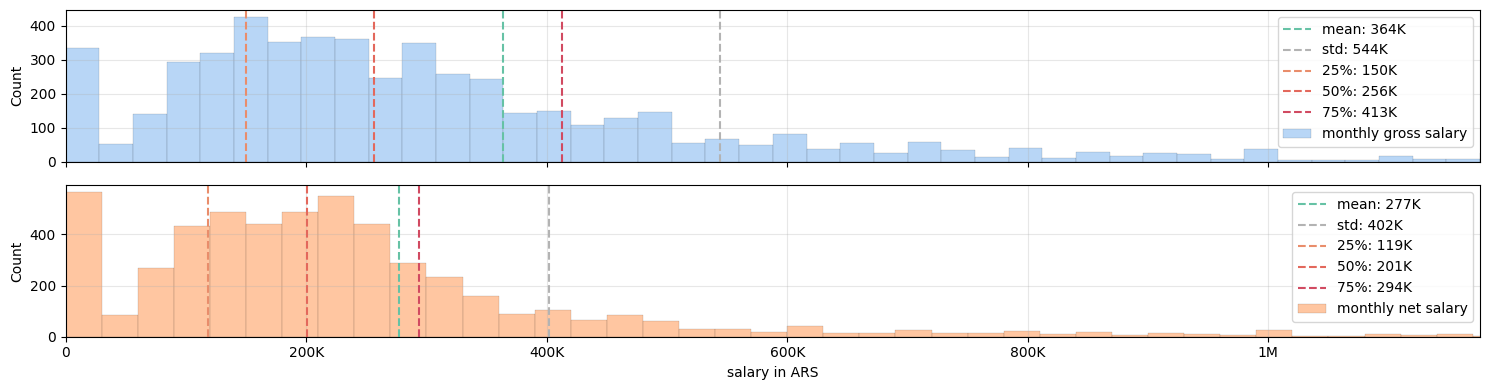

In [14]:
f, ax = plt.subplots(2, 1, figsize=HSUBPLOTS_FIGSIZE, dpi=DPI, sharex=True)
n_bins = 1000, 500

for i, salary in enumerate(['monthly_gross_salary', 'monthly_net_salary']):
    df_to_plot = df[salary]
    sns.histplot(df_to_plot, 
                 bins=n_bins[i],
                 ax=ax[i],
                 label=salary.replace('_', ' '),
                 color=next(MAIN_PALETTE),
                edgecolor='black')
    
    statistics = df_to_plot.describe(include='all')

    for j, name in enumerate(['mean', 'std']):
        statistic = statistics[name]
        ax[i].axvline(statistic,
                      label=f'{name}: {human_format(statistic)}',
                      color=CATEGORICAL_PALETTE.as_hex()[-j],
                      linestyle='dashed')
        
    for j, st in enumerate(['25%', '50%', '75%']):
        statistic = statistics[st]
        ax[i].axvline(statistic,
                      label=f'{st}: {human_format(statistic)}',
                      color=SECUENTIAL_PALETTE.as_hex()[j],
                      linestyle='dashed')
        
    ax[i].xaxis.set_major_formatter(FORMATTER)
    ax[i].grid(alpha=0.3)
    ax[i].legend()
        


plt.xlim(0, statistics['75%'] * 4)
plt.xlabel('salary in ARS')
plt.tight_layout()

In [15]:
df.describe(include='all').style.format(
    {'monthly_gross_salary': '${:,.2f}',
     'monthly_net_salary': '${:,.2f}'},
    precision=2,
    na_rep='missing'
).highlight_null(color='gray')

,work_dedication,monthly_gross_salary,monthly_net_salary,salary_comparison_last_semester,profile_years_experience,tools_programming_languages,profile_level_study,profile_gender
count,5358,"$5,358.00","$5,358.00",5358.00,5358.00,5356,2659,5358
unique,2,missing,missing,missing,missing,1318,7,14
top,Full-Time,missing,missing,missing,missing,Ninguno de los anteriores,Universitario,Varón Cis
freq,5106,missing,missing,missing,missing,886,1811,3902
mean,missing,"$363,510.54","$277,010.79",2.64,7.34,missing,missing,missing
std,missing,"$543,925.46","$401,942.30",0.88,7.20,missing,missing,missing
min,missing,$0.00,$0.00,1.00,0.00,missing,missing,missing
25%,missing,"$150,000.00","$118,612.19",2.00,2.00,missing,missing,missing
50%,missing,"$256,000.00","$201,000.00",3.00,5.00,missing,missing,missing
75%,missing,"$412,657.00","$294,000.00",3.00,11.00,missing,missing,missing


### Formateo de datos

Se exploran, determinan los tipos adecuados de datos para cada columna de interés y se los formatea si fuera necesario:

In [16]:
df.dtypes

work_dedication                     object
monthly_gross_salary               float64
monthly_net_salary                 float64
salary_comparison_last_semester      int64
profile_years_experience           float64
tools_programming_languages         object
profile_level_study                 object
profile_gender                      object
dtype: object

#### profile_years_experience

In [17]:
df.profile_years_experience.head(10)

0   10.00000
1    2.00000
2    2.00000
3    1.00000
4    1.00000
5    6.00000
6    1.00000
7    3.00000
8    0.00000
9    0.00000
Name: profile_years_experience, dtype: float64

Se agrupan y clasifican los valores para cantidad de años de experiencia en las categorías: '0-1', '1-2', '3-5', '6-10', '10+',
transformandola así en **categórica ordenada**.

In [18]:
def years_of_exp_range(years) -> str:
    """
    given the number of experience, return the corresponding range:
    '0-1', '1-2', '3-5', '6-10', '10+'
    if the number if out of range or is not a number,
    return a numpy nan object
    """
    try:
        if years >= 0 and years < 1:
            return '0-1'
        if years >= 1 and years <= 2:
            return '1-2'
        if years >= 3 and years <= 5:
            return '3-5'
        if years >= 6 and years <= 10:
            return '6-10'
        if years >= 10:
            return '10+'
        else:
            return np.nan
    except TypeError:
        return np.nan

In [19]:
df['profile_experience_range'] = df.profile_years_experience.apply(years_of_exp_range)
columns_of_interest.append('profile_experience_range')

In [20]:
df[['profile_years_experience', 'profile_experience_range']].head(10)

,profile_years_experience,profile_experience_range
0,10.00000,6-10
1,2.00000,1-2
2,2.00000,1-2
3,1.00000,1-2
4,1.00000,1-2
5,6.00000,6-10
6,1.00000,1-2
7,3.00000,3-5
8,0.00000,0-1
9,0.00000,0-1


In [21]:
exp_ranges = ['0-1', '1-2', '3-5', '6-10', '10+']
exp_range_cat = CategoricalDtype(categories=exp_ranges, ordered=True)
df.astype(exp_range_cat).profile_experience_range

0       6-10
1        1-2
2        1-2
3        1-2
4        1-2
        ... 
5353    6-10
5354    6-10
5355    6-10
5356     10+
5357     0-1
Name: profile_experience_range, Length: 5358, dtype: category
Categories (5, object): ['0-1' < '1-2' < '3-5' < '6-10' < '10+']

##### plot hist profile_experience_range

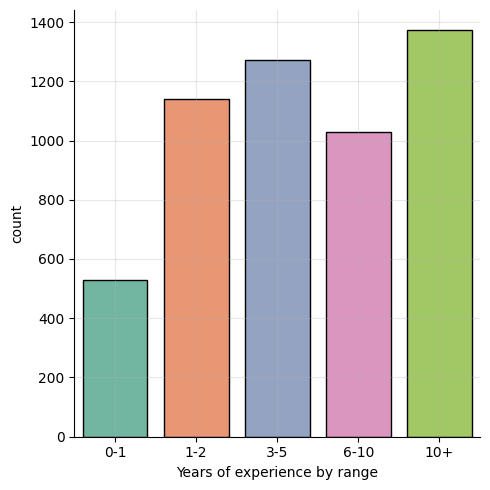

In [22]:
sns.catplot(data=df,
            x='profile_experience_range',
            kind='count',
            order=exp_ranges,
            palette=CATEGORICAL_PALETTE,
            edgecolor='black')

ax = plt.gca()

ax.figsize=FIGSIZE
ax.grid(alpha=0.3)

plt.xlabel('Years of experience by range')
plt.tight_layout()

> Nótese el elevado valor de conteo para personas encuestadas con `+10` años de experiencia, el que, a priori puede inferir en la media hacia valores elevados de salario.

#### salary_comparison_last_semester

#### work_dedication

Se categoriza la columna `work_dedication` como sigue:

In [23]:
df.work_dedication.unique()

array(['Full-Time', 'Part-Time'], dtype=object)

In [24]:
dedication_cat = CategoricalDtype(
    categories=['part-time', 'full-time'], ordered=True
)
df.work_dedication = df.work_dedication.apply(lambda x: x.lower()).astype(dedication_cat)

In [25]:
df.work_dedication

0       full-time
1       full-time
2       full-time
3       full-time
4       full-time
          ...    
5353    full-time
5354    full-time
5355    full-time
5356    full-time
5357    part-time
Name: work_dedication, Length: 5358, dtype: category
Categories (2, object): ['part-time' < 'full-time']

In [26]:
df.groupby(['work_dedication'])['monthly_gross_salary'].describe().style.format(
    {col: lambda x: human_format(x) for col in ['mean', 'std', 'min', '25%', '50%', '75%', 'max']},
    precision=2,
)

,count,mean,std,min,25%,50%,75%,max
work_dedication,,,,,,,,
part-time,252.00,143K,161K,0,60K,100K,161K,1M
full-time,5106.00,374K,554K,0,160K,265K,427K,28M


In [27]:
df.groupby('work_dedication').get_group('part-time').size, df.groupby('work_dedication').get_group('full-time').size

(2268, 45954)

##### plot hist work_dedication

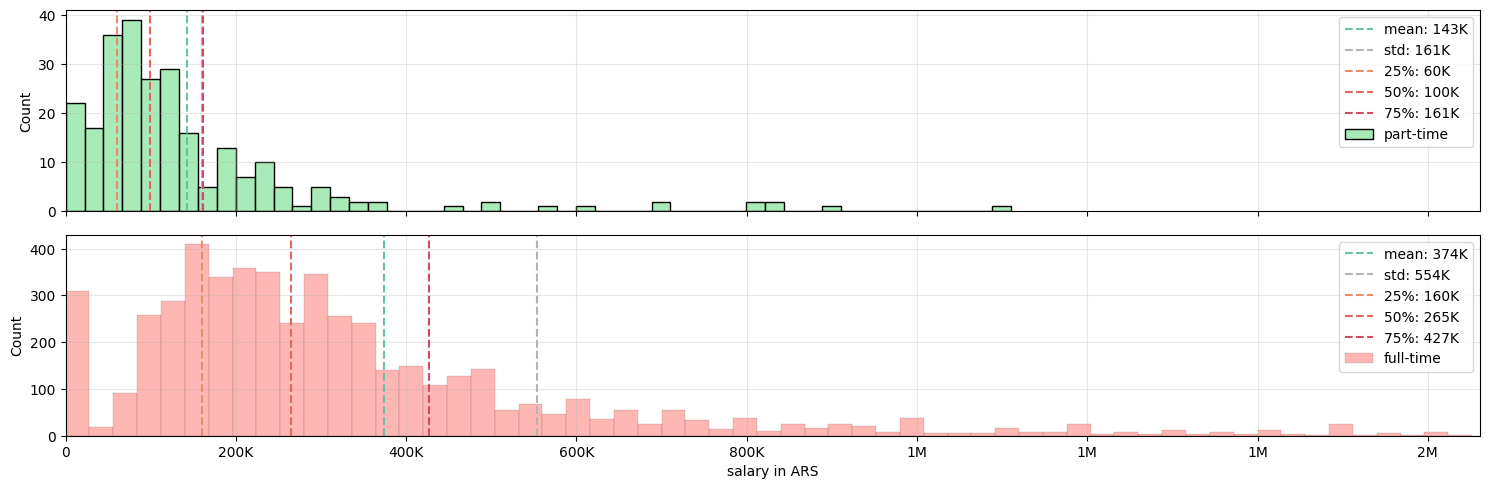

In [28]:
f, ax = plt.subplots(2, 1, figsize=VSUBPLOTS_FIGSIZE, dpi=DPI, sharex=True)
n_bins = 50, 1000

for i, dedication in enumerate(['part-time', 'full-time']):
    df_to_plot = df[df.work_dedication == dedication].monthly_gross_salary
    sns.histplot(df_to_plot, 
                 bins=n_bins[i],
                 label=dedication,
                 color=next(MAIN_PALETTE),
                edgecolor='black',
                 ax=ax[i],)
    
    statistics = df_to_plot.describe(include='all')

    for j, name in enumerate(['mean', 'std']):
        statistic = statistics[name]
        ax[i].axvline(statistic,
                      label=f'{name}: {human_format(statistic)}',
                      color=CATEGORICAL_PALETTE.as_hex()[-j],
                      linestyle='dashed')
        
    for j, st in enumerate(['25%', '50%', '75%']):
        statistic = statistics[st]
        ax[i].axvline(statistic,
                      label=f'{st}: {human_format(statistic)}',
                      color=SECUENTIAL_PALETTE.as_hex()[j],
                      linestyle='dashed')
        
    ax[i].xaxis.set_major_formatter(FORMATTER)
    ax[i].grid(alpha=0.3)
    ax[i].legend()

plt.xlim(0, 3 * statistics['std'])
plt.xlabel('salary in ARS')
plt.tight_layout()

En base al histograma anterior, los diferentes valores de conteo y en particular de estadísticos, así como la imposibilidad de relacionar certeramente las horas de dedicación entre part-time *(podrían ser 4 horas diarias, algunas horas a la semana, unas pocas al mes, etc)* se resuelve analizar en dos diferentes datasets, las dos diferentes categorías correspondientes a `work_dedication` ('part-time' y 'full-time')

#### tools

Se transforman a `list` las columnas que contienen enumeraciones de lenguajes/plataformas/tecnologías para hacer el conteo de las mismas:

In [29]:
df.tools_programming_languages

0                                             Python
1       CSS, HTML, Java, Javascript, SQL, TypeScript
2                            Javascript, PHP, Python
3                             Javascript, TypeScript
4                              CSS, HTML, Javascript
                            ...                     
5353                       Ninguno de los anteriores
5354                       Ninguno de los anteriores
5355                                       HTML, SQL
5356                                 Javascript, SQL
5357                       Ninguno de los anteriores
Name: tools_programming_languages, Length: 5358, dtype: object

In [30]:
df['list_of_tools_programming_languages'] = df['tools_programming_languages'].apply(
    lambda x: [
        entry.lower() for entry in str(x).split(', ') if 'Ningun' not in entry
    ] or np.nan)

In [31]:
columns_of_interest.append('list_of_tools_programming_languages')
df = df[columns_of_interest]

df.head()

,work_dedication,monthly_gross_salary,monthly_net_salary,salary_comparison_last_semester,profile_years_experience,tools_programming_languages,profile_level_study,profile_gender,profile_experience_range,list_of_tools_programming_languages
0,full-time,300000.00000,245000.00000,2,10.00000,Python,Universitario,Varón Cis,6-10,[python]
1,full-time,900000.00000,850000.00000,4,2.00000,"CSS, HTML, Java, Javascript, SQL, TypeScript",NaN,Varón Cis,1-2,"[css, html, java, javascript, sql, typescript]"
2,full-time,120000.00000,115000.00000,2,2.00000,"Javascript, PHP, Python",NaN,Varón Cis,1-2,"[javascript, php, python]"
3,full-time,440000.00000,0.00000,3,1.00000,"Javascript, TypeScript",NaN,Varón Cis,1-2,"[javascript, typescript]"
4,full-time,140000.00000,125000.00000,2,1.00000,"CSS, HTML, Javascript",NaN,Varón Cis,1-2,"[css, html, javascript]"


#### salary_comparison_last_semester

In [32]:
df.salary_comparison_last_semester.unique()

array([2, 4, 3, 1])

In [33]:
df.salary_comparison_last_semester.describe()

count   5358.00000
mean       2.63904
std        0.87526
min        1.00000
25%        2.00000
50%        3.00000
75%        3.00000
max        4.00000
Name: salary_comparison_last_semester, dtype: float64

In [34]:
df.salary_comparison_last_semester.astype('category')

0       2
1       4
2       2
3       3
4       2
       ..
5353    2
5354    2
5355    2
5356    3
5357    2
Name: salary_comparison_last_semester, Length: 5358, dtype: category
Categories (4, int64): [1, 2, 3, 4]

##### plot cat salary_comparison_last_semester

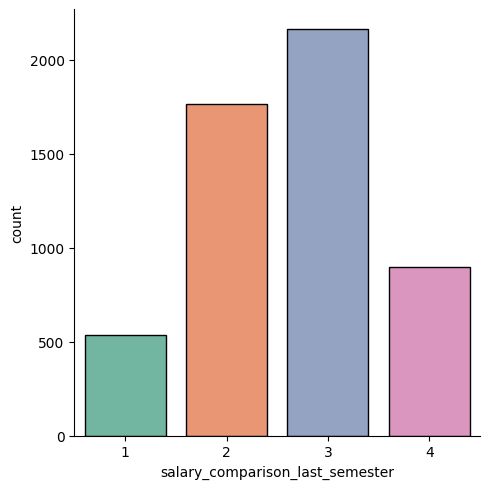

In [35]:
sns.catplot(data=df,
            x='salary_comparison_last_semester',
            kind='count',
            palette=CATEGORICAL_PALETTE,
           edgecolor='black')

#### profile_gender

La población de respuestas para géneros que no se puedan agrupar en los grupos binarios *mujer* y *varón*, por no estar normalizadas y pertenecer a una población pequeña, se asignan a un mismo grupo:

In [36]:
df.profile_gender.unique()

array(['Varón Cis', 'Varón cis', 'Mujer Cis', 'Mujer', 'Varón Trans',
       'Queer', 'No binarie', 'Mujer cis', 'Mujer Trans', 'mujer', 'Gay',
       'Fluido', 'Bigénero', 'Femenino'], dtype=object)

In [37]:
to_replace = {
    ('Varón Cis', 'Varón cis') : 'varon cis', 
    ('Mujer Cis', 'Mujer', 'Mujer cis', 'mujer', 'femenino', 'Femenino'): 'mujer cis',
    ('Varón Trans', 'Queer', 'No binarie', 'Gay', 'Fluido', 'Bigénero', 'Mujer Trans'): 'diversidades'}

for k, v in to_replace.items():
    old, new = k, v
    df.profile_gender = df.profile_gender.replace(
        old, new
    )

In [38]:
df.profile_gender

0          varon cis
1          varon cis
2          varon cis
3          varon cis
4          varon cis
            ...     
5353       mujer cis
5354       mujer cis
5355       mujer cis
5356       varon cis
5357    diversidades
Name: profile_gender, Length: 5358, dtype: object

In [39]:
df.profile_gender.astype('category')

0          varon cis
1          varon cis
2          varon cis
3          varon cis
4          varon cis
            ...     
5353       mujer cis
5354       mujer cis
5355       mujer cis
5356       varon cis
5357    diversidades
Name: profile_gender, Length: 5358, dtype: category
Categories (3, object): ['diversidades', 'mujer cis', 'varon cis']

In [40]:
df.profile_gender.value_counts()

profile_gender
varon cis       4331
mujer cis        929
diversidades      98
Name: count, dtype: int64

##### plot cat gender

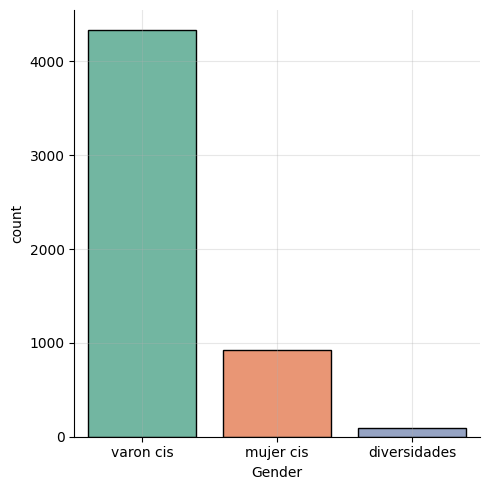

In [41]:
sns.catplot(data=df,
            x='profile_gender',
            kind='count',
            palette=CATEGORICAL_PALETTE,
            edgecolor='black')

ax = plt.gca()

ax.figsize=FIGSIZE
ax.grid(alpha=0.3)

plt.xlabel('Gender')
plt.tight_layout()

> Se puede observar claramente el **sesgo** del dataset, en el que las mujeres están **sub-representadas** respecto a la población humana. Así mismo y por demás las diversidades.

#### profile_level_study

In [42]:
df.profile_level_study

0       Universitario
1                 NaN
2                 NaN
3                 NaN
4                 NaN
            ...      
5353              NaN
5354              NaN
5355              NaN
5356    Universitario
5357    Universitario
Name: profile_level_study, Length: 5358, dtype: object

In [43]:
df.profile_level_study.unique()

array(['Universitario', nan, 'Terciario', 'Secundario',
       'Posgrado/Especialización', 'Maestría', 'Doctorado',
       'Posdoctorado'], dtype=object)

In [44]:
study_levels = ['Secundario', 'Terciario', 'Universitario', 'Posgrado/Especialización', 'Maestría', 'Doctorado', 'Posdoctorado']
study_cat = CategoricalDtype(categories=study_levels, ordered=True)
df.profile_level_study.astype('str').astype(study_cat)

0       Universitario
1                 NaN
2                 NaN
3                 NaN
4                 NaN
            ...      
5353              NaN
5354              NaN
5355              NaN
5356    Universitario
5357    Universitario
Name: profile_level_study, Length: 5358, dtype: category
Categories (7, object): ['Secundario' < 'Terciario' < 'Universitario' < 'Posgrado/Especialización' < 'Maestría' < 'Doctorado' < 'Posdoctorado']

##### plot hist study

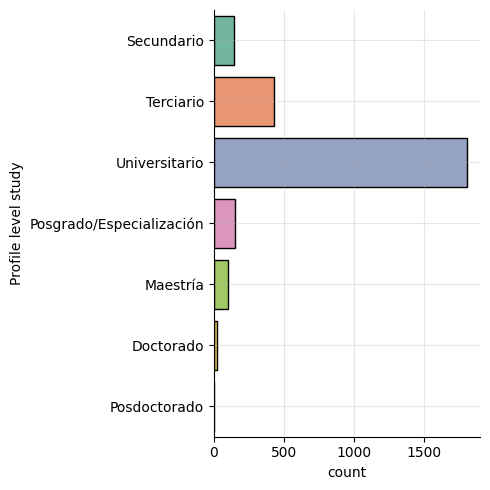

In [45]:
sns.catplot(data=df,
            y='profile_level_study',
            kind='count',
            order=study_levels,
            palette=CATEGORICAL_PALETTE,
            edgecolor='black')

ax = plt.gca()

ax.figsize=FIGSIZE
ax.grid(alpha=0.3)

plt.ylabel('Profile level study')
plt.tight_layout()

Se puede observar un elevado número de personas encuestadas con nivel universitario alcanzado, desproporcionado por sobre los otros niveles, se podría presumir una muestra sesgada

### Filtrado de filas

Se "dropean" aquellas filas del DataFrame que al cabo del formateo de las columnas de interés, resulten en `NaN` en la columna `list_of_tools_programming_languages`, dado que es la columna protagonista junto con las de salarios.

In [46]:
df[df.list_of_tools_programming_languages.isna()]

,work_dedication,monthly_gross_salary,monthly_net_salary,salary_comparison_last_semester,profile_years_experience,tools_programming_languages,profile_level_study,profile_gender,profile_experience_range,list_of_tools_programming_languages
10,full-time,242000.00000,202029.00000,3,3.00000,Ninguno de los anteriores,Universitario,varon cis,3-5,NaN
11,full-time,280000.00000,180000.00000,1,25.00000,Ninguno de los anteriores,Universitario,varon cis,10+,NaN
23,full-time,212765.96000,172601.00000,2,0.00000,Ninguno de los anteriores,Secundario,varon cis,0-1,NaN
43,full-time,122000.00000,106000.00000,2,4.00000,Ninguno de los anteriores,NaN,varon cis,3-5,NaN
47,full-time,275000.00000,253000.00000,3,5.00000,Ninguno de los anteriores,NaN,mujer cis,3-5,NaN
...,...,...,...,...,...,...,...,...,...,...
5345,full-time,314000.00000,230.00000,2,3.00000,Ninguno de los anteriores,NaN,varon cis,3-5,NaN
5349,full-time,800.00000,0.00000,4,6.00000,Ninguno de los anteriores,NaN,mujer cis,6-10,NaN
5353,full-time,311.70000,214.80000,2,6.00000,Ninguno de los anteriores,NaN,mujer cis,6-10,NaN
5354,full-time,150000.00000,93000.00000,2,7.00000,Ninguno de los anteriores,NaN,mujer cis,6-10,NaN


In [47]:
df_without_nan_programming_languages = df.dropna(subset=['list_of_tools_programming_languages'])

In [48]:
df.size, df_without_nan_programming_languages.size

(53580, 44720)

In [49]:
df = df_without_nan_programming_languages

In [50]:
df.head()

,work_dedication,monthly_gross_salary,monthly_net_salary,salary_comparison_last_semester,profile_years_experience,tools_programming_languages,profile_level_study,profile_gender,profile_experience_range,list_of_tools_programming_languages
0,full-time,300000.00000,245000.00000,2,10.00000,Python,Universitario,varon cis,6-10,[python]
1,full-time,900000.00000,850000.00000,4,2.00000,"CSS, HTML, Java, Javascript, SQL, TypeScript",NaN,varon cis,1-2,"[css, html, java, javascript, sql, typescript]"
2,full-time,120000.00000,115000.00000,2,2.00000,"Javascript, PHP, Python",NaN,varon cis,1-2,"[javascript, php, python]"
3,full-time,440000.00000,0.00000,3,1.00000,"Javascript, TypeScript",NaN,varon cis,1-2,"[javascript, typescript]"
4,full-time,140000.00000,125000.00000,2,1.00000,"CSS, HTML, Javascript",NaN,varon cis,1-2,"[css, html, javascript]"


#### programming languages

Por ser una de las columnas protagonistas del análisis, se realiza un tratamiento extra, que consiste en corroborar que los strings listados corresponden o se encuentran incluidos en el nombre de un lenguaje de programación válido.

Se extraen todos los ítems de la [lista de lenguajes de programación de wikipedia](https://en.wikipedia.org/wiki/List_of_programming_languages):

In [51]:
wiki_programming_languages = [
    "A.NET (A#/A sharp)", "A-0 System", "A+ (A plus)", "ABAP", "ABC", "ABC ALGOL", "ACC", "Accent (Rational Synergy)", "Ace Distributed Application Specification Language (DASL)",
    "Action!", "ActionScript", "Actor", "Ada – ISO/IEC 8652", "Adenine (Haystack)", "AdvPL", "Agda", "Agilent VEE (Keysight VEE)", "Agora", "AIMMS", "Aldor", "Alef", "ALF", "ALGOL 58",
    "ALGOL 60", "ALGOL 68", "ALGOL W", "Alice (Alice ML)", "Alma-0", "AmbientTalk", "Amiga E", "AMPL", "Analitik", "AngelScript", "Apache Pig latin", "Apex (Salesforce.com, Inc)", "APL",
    "App Inventor for Android's visual block language (MIT App Inventor)", "AppleScript", "APT", "Arc", "ARexx", "Argus", "Assembly language (ASM)", "AutoHotkey", "AutoIt",
    "AutoLISP / Visual LISP", "Averest", "AWK", "Axum", "B", "Babbage", "Ballerina", "Bash/Shell", "BASIC", "Batch file (Windows/MS-DOS)", "bc (basic calculator)", "BCPL", "BeanShell",
    "BETA", "BLISS", "Blockly", "BlooP", "Boo", "Boomerang", "Bosque", "C – ISO/IEC 9899", "C-- (C minus minus)", "C++ (C plus plus) – ISO/IEC 14882", "C*", "C# (C sharp) – ISO/IEC 23270",
    "C/AL", "Caché ObjectScript", "C Shell (csh)", "Caml", "Carbon", "Catrobat", "Cayenne (Lennart Augustsson)", "CDuce", "Cecil", "CESIL (Computer Education in Schools Instruction Language)",
    "Céu", "Ceylon", "CFEngine", "Cg (High-Level Shader/Shading Language [HLSL])", "Ch", "Chapel (Cascade High Productivity Language)", "Charm", "CHILL", "CHIP-8", "ChucK",
    "Cilk (also Cilk++ and Cilk plus)", "Claire", "Clarion", "Clean", "Clipper", "CLIPS", "CLIST", "Clojure", "CLU", "CMS-2", "COBOL – ISO/IEC 1989", "CobolScript – COBOL Scripting language",
    "Cobra", "CoffeeScript", "ColdFusion", "COMAL", "COMIT", "Common Intermediate Language (CIL)", "Common Lisp (also known as CL)", "COMPASS", "Component Pascal", "COMTRAN", "Concurrent Pascal",
    "Constraint Handling Rules (CHR)", "Control Language", "Coq", "Coral 66", "CorVision", "COWSEL", "CPL", "Cryptol", "Crystal", "Csound", "Cuneiform", "Curl", "Curry", "Cybil", "Cyclone",
    "Cypher Query Language", "Cython", "CEEMAC", "D (also known as dlang)", "Dart", "Darwin", "DataFlex", "Datalog", "DATATRIEVE", "dBase", "dc", "DCL (DIGITAL Command Language)", "Delphi",
    "DIBOL", "DinkC", "Dog", "Draco", "DRAKON", "Dylan", "DYNAMO", "DAX (Data Analysis Expressions)", "E", "Ease", "Easy PL/I", "EASYTRIEVE PLUS", "eC", "ECMAScript", "Edinburgh IMP", "EGL",
    "Eiffel", "ELAN", "Elixir", "Elm", "Emacs Lisp", "Emerald", "Epigram", "EPL (Easy Programming Language)", "Erlang", "es", "Escher", "ESPOL", "Esterel", "Etoys", "Euclid", "Euler", "Euphoria",
    "EusLisp Robot Programming Language", "CMS EXEC (EXEC)", "EXEC 2", "Executable UML", "Ezhil", "F", "F# (F sharp)", "F*", "Factor", "Fantom", "FAUST", "FFP", "fish", "Fjölnir", "FL", "Flavors",
    "Flex", "Flix", "FlooP", "FLOW-MATIC (B0)", "FOCAL (Formulating On-Line Calculations in Algebraic Language/FOrmula CALculator)", "FOCUS", "FOIL", "FORMAC (FORMula MAnipulation Compiler)",
    "@Formula", "Forth", "Fortran – ISO/IEC 1539", "Fortress", "FP", "FoxBase/FoxPro", "Franz Lisp", "Futhark", "F-Script", "Game Maker Language", "GameMonkey Script",
    "GAMS (General Algebraic Modeling System)", "GAP", "G-code", "GDScript (Godot)", "Genie", "GDL (Geometric Description Language)", "GEORGE", "GLSL (OpenGL Shading Language)", "GNU E",
    "GNU Guile (GNU Ubiquitous Intelligent Language for Extensions)", "Go", "Go!", "GOAL (Game Oriented Assembly Lisp)", "Gödel", "Golo", "GOM (Good Old Mad)", "Google Apps Script", "Gosu",
    "GOTRAN (IBM 1620)", "GPSS (General Purpose Simulation System)", "GraphTalk (Computer Sciences Corporation)", "GRASS", "Grasshopper", "Groovy (Apache Groovy)", "Hack", "HAGGIS", "HAL/S",
    "Halide (programming language)", "Hamilton C shell", "Harbour", "Hartmann pipelines", "Haskell", "Haxe", "Hermes", "High Level Assembly (HLA)", "High Level Shader Language (HLSL)", "Hollywood",
    "HolyC (TempleOS)", "Hop", "Hopscotch", "Hope", "Hume", "HyperTalk", "Hy", "Io", "Icon", "IBM Basic assembly language", "IBM HAScript", "IBM Informix-4GL", "IBM RPG", "IDL", "Idris", "Inform",
    "ISLISP", "J", "J# (J sharp)", "J++ (J plus plus)", "JADE", "Jai", "JAL", "Janus (concurrent constraint programming language)", "Janus (time-reversible computing programming language)", "JASS",
    "Java", "JavaFX Script", "JavaScript", "Jess", "JCL", "JEAN", "Join Java", "JOSS", "Joule", "JOVIAL", "Joy", "jq", "JScript", "JScript .NET", "Julia", "Jython", "K", "Kaleidoscope", "Karel",
    "KEE", "Kixtart", "Klerer-May System", "KIF (Knowledge Interchange Format)", "Kojo", "Kotlin", "KRC", "KRL", "KRL (KUKA Robot Language)", "KRYPTON", "KornShell (ksh)", "Kodu", "Kv (Kivy)",
    "LabVIEW", "Ladder", "LANSA", "Lasso", "Lava", "LC-3", "Lean", "Legoscript", "LIL", "LilyPond", "Limbo", "LINC", "Lingo", "LINQ", "LIS", "LISA", "Language H", "Lisp – ISO/IEC 13816", "Lite-C",
    "Lithe", "Little b", "LLL", "Logo", "Logtalk", "LotusScript", "LPC", "LSE", "LSL", "LiveCode", "LiveScript", "Lua", "Lucid", "Lustre", "LYaPAS", "Lynx", "M Formula language", "M2001", "M4", "M#",
    "Machine code", "MAD (Michigan Algorithm Decoder)", "MAD/I", "Magik", "Magma", "Máni", "Maple", "MAPPER (now part of BIS)", "MARK-IV (now VISION:BUILDER)", "Mary", "MATLAB",
    "MASM Microsoft Assembly x86", "MATH-MATIC", "Maude system", "Maxima (see also Macsyma)", "Max (Max Msp – Graphical Programming Environment)", "MaxScript internal language 3D Studio Max",
    "Maya (MEL)", "MDL", "Mercury", "Mesa", "MHEG-5 (Interactive TV programming language)", "Microcode", "Microsoft Power Fx", "MIIS", "Milk (programming language)", "MIMIC", "Mirah", "Miranda",
    "MIVA Script", "ML", "Model 204", "Modelica", "Malbolge", "Modula", "Modula-2", "Modula-3", "Mohol", "Mojo", "MOO", "Mortran", "Mouse", "MPD", "MSL", "MUMPS", "MuPAD", "Mutan",
    "Mystic Programming Language (MPL)", "NASM", "Napier88", "Neko", "Nemerle", "NESL", "Net.Data", "NetLogo", "NetRexx", "NewLISP", "NEWP", "Newspeak", "NewtonScript", "Nial", "Nickle (NITIN)",
    "Nim", "Nix (Systems configuration language)", "NPL", "Not eXactly C (NXC)", "Not Quite C (NQC)", "NSIS", "Nu", "NWScript", "NXT-G", "o:XML", "Oak", "Oberon", "OBJ2", "Object Lisp", "ObjectLOGO",
    "Object REXX", "Object Pascal", "Objective-C", "Obliq", "OCaml", "occam", "occam-π", "Octave", "OmniMark", "Opa", "Opal", "Open Programming Language (OPL)", "OpenCL",
    "OpenEdge Advanced Business Language (ABL)", "OpenVera", "OpenQASM", "OPS5", "OptimJ", "Orc", "ORCA/Modula-2", "Oriel", "Orwell", "Oxygene", "Oz", "P", "P4", "P′′", "ParaSail", "PARI/GP",
    "Pascal – ISO 7185", "Pascal Script", "PCASTL", "PCF", "PEARL", "PeopleCode", "Perl", "PDL", "Pharo", "PHP", "Pico", "Picolisp", "Pict", "Pike", "PILOT", "Pipelines", "Pizza", "PL-11", "PL/0",
    "PL/B", "PL/C", "PL/I – ISO 6160", "PL/M", "PL/P", "PL/S", "PL/SQL", "PL360", "PLANC", "Plankalkül", "Planner", "PLEX", "PLEXIL", "Plus", "POP-11", "POP-2", "PostScript", "PortablE",
    "POV-Ray SDL", "Powerhouse", "PowerBuilder – 4GL GUI application generator from Sybase", "PowerShell", "PPL", "Processing", "Processing.js", "Prograph", "Project Verona", "Prolog", "PROMAL",
    "Promela", "PROSE modeling language", "PROTEL", "ProvideX", "Pro*C", "Pure", "Pure Data", "PureScript", "PWCT", "Python", "Q (programming language from Kx Systems)", "Q#", "Qalb",
    "Quantum Computation Language", "QtScript", "QuakeC", "QPL", ".QL", "R", "R++", "Racket", "Raku", "RAPID", "Rapira", "Ratfiv", "Ratfor", "rc", "Reason", "REBOL", "Red", "Redcode", "REFAL",
    "REXX", "Ring", "ROOP", "RPG", "RPL", "RSL", "RTL/2", "Ruby", "Rust", "S", "S2", "S3", "S-Lang", "S-PLUS", "SA-C", "SabreTalk", "SAIL", "SAKO", "SAS", "SASL", "Sather", "Sawzall", "Scala",
    "Scheme", "Scilab", "Scratch", "ScratchJr", "Script.NET", "Sed", "Seed7", "Self", "SenseTalk", "SequenceL", "Serpent", "SETL", "Short Code", "SIMPOL", "SIGNAL", "SiMPLE", "SIMSCRIPT", "Simula",
    "Simulink", "SISAL", "SKILL", "SLIP", "SMALL", "Smalltalk", "SML", "Strongtalk", "Snap!", "SNOBOL (SPITBOL)", "Snowball", "SOL", "Solidity", "SOPHAEROS", "Source", "SPARK", "Speakeasy",
    "Speedcode", "SPIN", "SP/k", "SPS", "SQL", "SQR", "Squeak", "Squirrel", "SR", "S/SL", "Starlogo", "Strand", "Stata", "Stateflow", "Subtext", "SBL", "SuperCollider", "Superplan", "SuperTalk",
    "Swift (Apple programming language)", "Swift (parallel scripting language)", "SYMPL", "T", "TACL", "TACPOL", "TADS (Text Adventure Development System)", "TAL", "Tcl", "Tea",
    "TECO (Text Editor and Corrector)", "TELCOMP", "TeX", "TEX (Text Executive Programming Language)", "TIE", "TMG (TransMoGrifier), compiler-compiler", "Tom", "Toi", "Topspeed (Clarion)",
    "TPU (Text Processing Utility)", "Trac", "TTM", "T-SQL (Transact-SQL)", "Transcript (LiveCode)", "TTCN (Tree and Tabular Combined Notation)", "Turing", "TUTOR (PLATO Author Language)",
    "TXL", "TypeScript", "Tynker", "Ubercode", "UCSD Pascal", "Umple", "Unicon", "Uniface", "UNITY", "UnrealScript", "Vala", "Vim script", "Viper (Ethereum/Ether (ETH))", "Visual DataFlex",
    "Visual DialogScript", "Visual FoxPro", "Visual J++ (Visual J plus plus)", "Visual LISP", "Visual Objects", "Visual Prolog", "WATFIV, WATFOR (WATerloo FORtran IV)", "WebAssembly",
    "WebDNA", "Whiley", "Winbatch", "Wolfram Language", "Wyvern", "X++ (X plus plus/Microsoft Dynamics AX)", "X10", "xBase++ (xBase plus plus)", "XBL", "XC (targets XMOS architecture)",
    "xHarbour", "XL", "Xojo", "XOTcl", "Xod", "XPL", "XPL0", "XQuery", "XSB", "XSharp (X#)", "XSLT", "Xtend", "Yorick", "YQL", "Yoix", "Z notation", "Z shell", "Zebra, ZPL, ZPL2", "Zeno",
    "ZetaLisp", "Zig", "Zonnon", "ZOPL", "ZPL", "Z++"
]

> This is an index to notable programming languages, in current or historical use. Dialects of BASIC, esoteric programming languages, and markup languages are not included. A programming language does not need to be imperative or Turing-complete, but must be executable and so does not include markups such as HTML or XML, but does include domain-specific languages such as SQL and its dialects. 

In [52]:
WIKI_PROGRAMMING_LANGUAGES = [lang.split('(')[0].split('-')[0].strip().lower() for lang in wiki_programming_languages]   # this could be replaced by a regex
WIKI_PROGRAMMING_LANGUAGES.extend(['html', 'css', 'sql', '.net', 'cobol', 'vba', 'arduino', 'assembler', 'objective-c'])

In [53]:
df.list_of_tools_programming_languages.apply(lambda v: [x.split('(')[0].split('-')[0].strip().lower() for x in v])  # this could be replaced by a regex

0                                             [python]
1       [css, html, java, javascript, sql, typescript]
2                            [javascript, php, python]
3                             [javascript, typescript]
4                              [css, html, javascript]
                             ...                      
5350                                      [javascript]
5351                                     [python, sql]
5352                                             [sql]
5355                                       [html, sql]
5356                                 [javascript, sql]
Name: list_of_tools_programming_languages, Length: 4472, dtype: object

In [54]:
df.list_of_tools_programming_languages.apply(
    lambda v: ['bash/shell' if 'bash' in x or 'shell' in x else x for x in v]
)

0                                             [python]
1       [css, html, java, javascript, sql, typescript]
2                            [javascript, php, python]
3                             [javascript, typescript]
4                              [css, html, javascript]
                             ...                      
5350                                      [javascript]
5351                                     [python, sql]
5352                                             [sql]
5355                                       [html, sql]
5356                                 [javascript, sql]
Name: list_of_tools_programming_languages, Length: 4472, dtype: object

In [55]:
df.loc[:, 'list_of_normalized_languages'] = df.loc[:, 'list_of_tools_programming_languages'].apply(
    lambda v: [x for x in v if x in WIKI_PROGRAMMING_LANGUAGES]
)

/tmp/ipykernel_986683/1810119053.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[:, 'list_of_normalized_languages'] = df.loc[:, 'list_of_tools_programming_languages'].apply(


In [56]:
df.list_of_normalized_languages.apply(lambda v: np.nan is not v)

0       True
1       True
2       True
3       True
4       True
        ... 
5350    True
5351    True
5352    True
5355    True
5356    True
Name: list_of_normalized_languages, Length: 4472, dtype: bool

In [57]:
df = df.dropna(subset=['list_of_normalized_languages'])

In [58]:
df.head(15)[['monthly_gross_salary', 'list_of_tools_programming_languages']].style.format(
    {'monthly_gross_salary': human_format,}
)

,monthly_gross_salary,list_of_tools_programming_languages
0,300K,['python']
1,900K,"['css', 'html', 'java', 'javascript', 'sql', 'typescript']"
2,120K,"['javascript', 'php', 'python']"
3,440K,"['javascript', 'typescript']"
4,140K,"['css', 'html', 'javascript']"
5,633K,"['go', 'java']"
6,110K,['java']
7,157K,"['html', 'javascript', 'sql', 'typescript']"
8,55K,['sql']
9,190K,['java']


In [59]:
columns_of_interest.append('list_of_normalized_languages')

#### salary

In [60]:
df[df.monthly_gross_salary < df.monthly_net_salary]

,work_dedication,monthly_gross_salary,monthly_net_salary,salary_comparison_last_semester,profile_years_experience,tools_programming_languages,profile_level_study,profile_gender,profile_experience_range,list_of_tools_programming_languages,list_of_normalized_languages
20,full-time,166000.00000,227000.00000,3,5.00000,SQL,NaN,varon cis,3-5,[sql],[sql]
29,full-time,10200.00000,82000.00000,1,12.00000,".NET, C#, HTML, SQL",NaN,varon cis,10+,"[.net, c#, html, sql]","[.net, c#, html, sql]"
55,full-time,71000.00000,85000.00000,1,2.00000,"COBOL, CSS, HTML, Java, Javascript, PHP, SQL",Universitario,varon cis,1-2,"[cobol, css, html, java, javascript, php, sql]","[cobol, css, html, java, javascript, php, sql]"
96,full-time,214200.00000,268200.00000,4,1.50000,"HTML, Javascript, SQL",NaN,varon cis,1-2,"[html, javascript, sql]","[html, javascript, sql]"
97,part-time,55000.00000,690000.00000,4,0.00000,"Javascript, Python",Universitario,varon cis,0-1,"[javascript, python]","[javascript, python]"
...,...,...,...,...,...,...,...,...,...,...,...
5263,full-time,80000.00000,111000.00000,2,0.00000,"CSS, HTML, Javascript, PHP, SQL",Universitario,mujer cis,0-1,"[css, html, javascript, php, sql]","[css, html, javascript, php, sql]"
5264,full-time,160000.00000,170000.00000,3,3.00000,"C#, HTML, Javascript, VBA",Universitario,mujer cis,3-5,"[c#, html, javascript, vba]","[c#, html, javascript, vba]"
5273,full-time,120.00000,120000.00000,1,4.00000,HTML,NaN,mujer cis,3-5,[html],[html]
5300,full-time,139.00000,120000.00000,3,1.00000,"Java, SQL",NaN,varon cis,1-2,"[java, sql]","[java, sql]"


Se sabe que el **salario neto** corresponde al **salario bruto menos carga impositiva, deducciones, etc**,  
se eliminan las filas donde filas donde $\text{salario_bruto} < \text{salario_neto}$

In [61]:
df_without_wrong_salaries_ratio = df[df.monthly_gross_salary > df.monthly_net_salary]
df.size, df_without_wrong_salaries_ratio.size

(49192, 42471)

In [62]:
df = df_without_wrong_salaries_ratio

### Función de distribución de probabilidad

#### Part-time vs full-time

In [63]:
df_part_time = df.groupby('work_dedication').get_group('part-time')
df_full_time = df.groupby('work_dedication').get_group('full-time')

##### plot hist part-time vs full-time

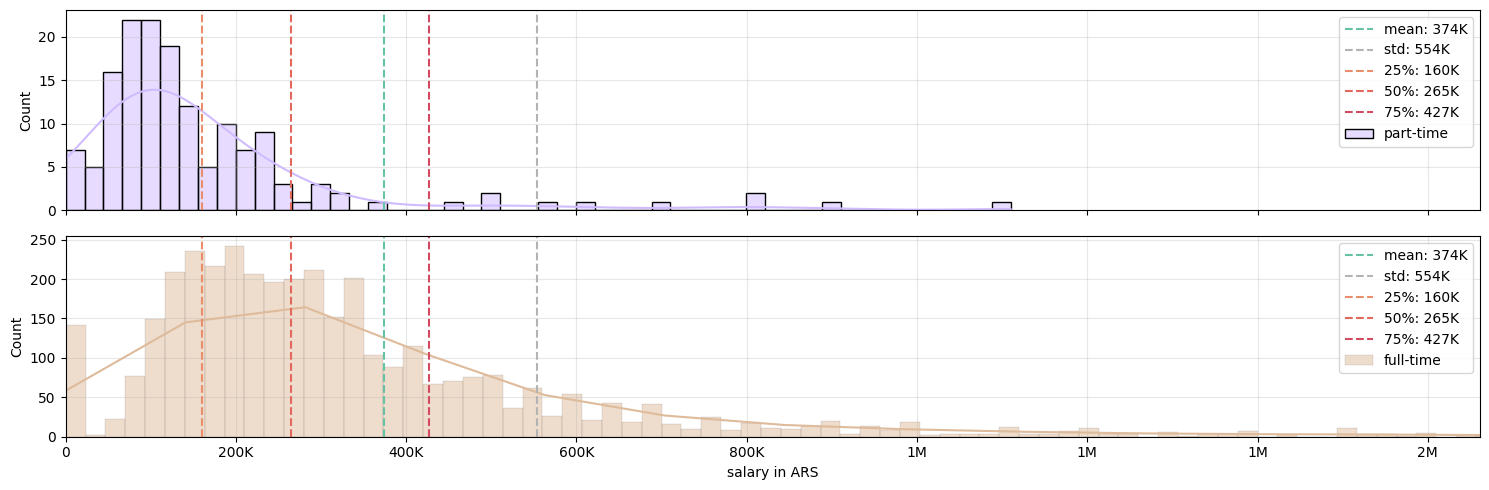

In [64]:
f, ax = plt.subplots(2, 1, figsize=VSUBPLOTS_FIGSIZE, dpi=DPI, sharex=True)
n_bins = 50, 1200

for i, df in enumerate([df_part_time, df_full_time]):
    sns.histplot(df,
                 x='monthly_gross_salary',
                 bins=n_bins[i],
                 ax=ax[i],
                 label=df.work_dedication.unique()[0],
                 color=next(MAIN_PALETTE),
                 edgecolor='black',  # this is not working well...
                 kde=True)
    
    statistics = df_to_plot.describe(include='all')

    for j, name in enumerate(['mean', 'std']):
        statistic = statistics[name]
        ax[i].axvline(statistic,
                      label=f'{name}: {human_format(statistic)}',
                      color=CATEGORICAL_PALETTE.as_hex()[-j],
                      linestyle='dashed')
        
    for j, st in enumerate(['25%', '50%', '75%']):
        statistic = statistics[st]
        ax[i].axvline(statistic,
                      label=f'{st}: {human_format(statistic)}',
                      color=SECUENTIAL_PALETTE.as_hex()[j],
                      linestyle='dashed')
        
    ax[i].xaxis.set_major_formatter(FORMATTER)
    ax[i].grid(alpha=0.3)
    ax[i].legend()

plt.xlim(0, 3 * statistics['std'])
plt.xlabel('salary in ARS')
plt.tight_layout()

- Las envolventes sugieren curvas de comportamiento exponencial **normal o gaussiano**.
- Dado que ambos conjuntos de datos provienen de la misma fuente, se trata a ambos con referencia en la **función de distribución de probabilidad Normal y Gaussiana**.

### Outliers

#### inferior

Se define el límite inferior para descarte de outliers como sigue:

##### full-time

- Valores por debajo del **salario mínimo vital y móvil en Argentina en el año correspondiente al dataset (2022)**:
    - ARS $61953 [Según el Consejo Nac del Empleo, la Productividad y el Salario Mínimo, Vital y Móvil](https://www.argentina.gob.ar/trabajo/consejodelsalario)
> Se aplica el mínimo a ambas columnas (neto y bruto)

In [65]:
min_full_time_salary = 61_953

gross_salary_mask = df_full_time.monthly_gross_salary > min_full_time_salary
net_salary_mask = df_full_time.monthly_net_salary > min_full_time_salary

df_full_time_without_low_outliers = df_full_time[gross_salary_mask & net_salary_mask]

In [66]:
df_full_time.size, df_full_time_without_low_outliers.size

(40777, 36564)

##### plot hist full-time

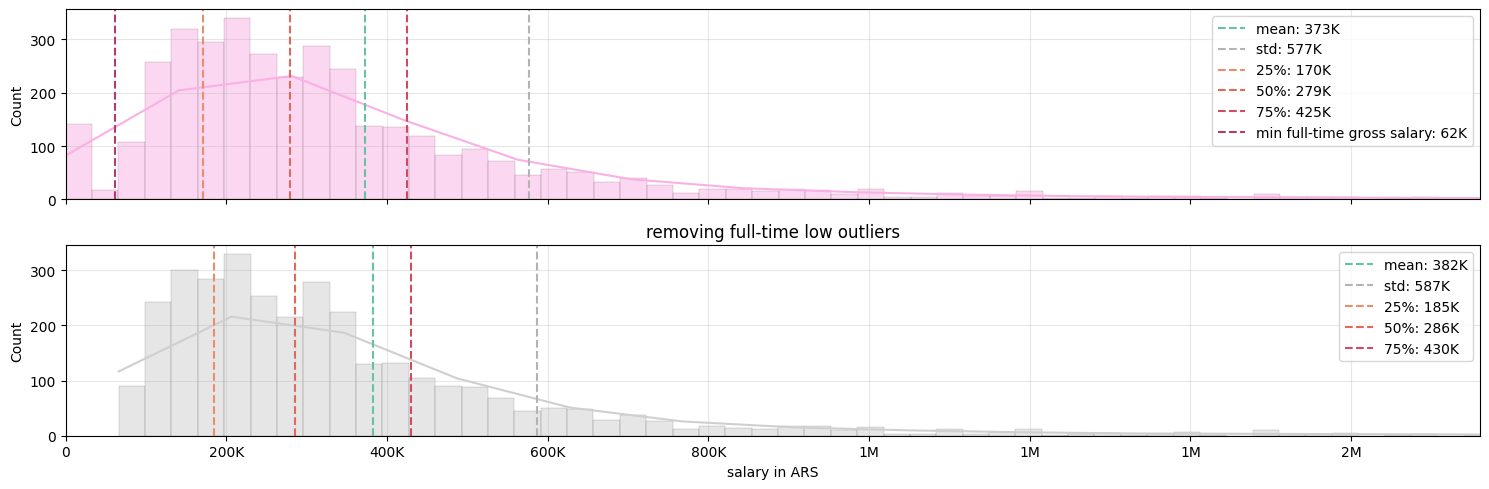

In [67]:
f, ax = plt.subplots(2, 1, figsize=VSUBPLOTS_FIGSIZE, dpi=DPI, sharex=True)

for i, df in enumerate([df_full_time, df_full_time_without_low_outliers]):
    df_to_plot = df.monthly_gross_salary
    sns.histplot(df_to_plot, 
                 ax=ax[i],
                 color=next(MAIN_PALETTE),
                 edgecolor='black',
                 kde=True)
    
    statistics = df_to_plot.describe(include='all')

    for j, name in enumerate(['mean', 'std']):
        statistic = statistics[name]
        ax[i].axvline(statistic,
                      label=f'{name}: {human_format(statistic)}',
                      color=CATEGORICAL_PALETTE.as_hex()[-j],
                      linestyle='dashed',)
        
    for j, st in enumerate(['25%', '50%', '75%']):
        statistic = statistics[st]
        ax[i].axvline(statistic,
                      label=f'{st}: {human_format(statistic)}',
                      color=SECUENTIAL_PALETTE.as_hex()[j],
                      linestyle='dashed')
        
    if i == 0:
        ax[i].axvline(min_full_time_salary,
                      label=f'min full-time gross salary: {human_format(min_full_time_salary)}',
                      color=SECUENTIAL_PALETTE.as_hex()[j+1],
                      linestyle='dashed')
        
    ax[i].xaxis.set_major_formatter(FORMATTER)
    ax[i].grid(alpha=0.3)
    ax[i].legend()

plt.xlim(0, 3 * statistics['std'])
plt.xlabel('salary in ARS')
plt.title('removing full-time low outliers')
plt.tight_layout()

##### part-time

Dado que no se cuenta con información sobre las horas de dedicación aproximadas para trabajos *part-time*, y que éstos pueden ser del tipo *"freelos"* significando un ingreso extra para la persona encuestada, se determina el percentil aproximado correspondiente al valor mínimo para salarios full-time anteriormente establecido, para aplicar esta misma *proporción* al sub data set de part-time.

> Cabe aclarar que los valores antes expuestos se emplean como *guía* para eliminar outliers, pero no necesariamente estos valores mínimos sean reales, suficientes, ni dignos en la práctica.

Se determina a qué percentile corresponde la entrada de salario cuyo valor se acerca más al límite inferior de outliers antes definido:

In [68]:
gross_distance_to_min_salary = df_full_time.monthly_gross_salary.apply(
    lambda x: (x - min_full_time_salary)
).apply(lambda n: -n if n < 0 else n)

gross_distance_to_min_salary.apply(human_format)

0       238K
1       838K
2        58K
3       378K
4        78K
        ... 
5348    238K
5351     48K
5352     58K
5355    168K
5356    389K
Name: monthly_gross_salary, Length: 3707, dtype: object

In [69]:
gross_min_idx = gross_distance_to_min_salary.idxmin()
human_format(gross_distance_to_min_salary.loc[gross_min_idx])

'553'

In [70]:
net_distance_to_min_salary = df_full_time.monthly_net_salary.apply(
    lambda x: (x - min_full_time_salary)
).apply(lambda n: -n if n < 0 else n)

net_distance_to_min_salary.apply(human_format)

0       183K
1       788K
2        53K
3        62K
4        63K
        ... 
5348    232K
5351     29K
5352     28K
5355    129K
5356    236K
Name: monthly_net_salary, Length: 3707, dtype: object

In [71]:
net_min_idx = gross_distance_to_min_salary.idxmin()
human_format(net_distance_to_min_salary.loc[net_min_idx])

'4K'

In [72]:
df_full_time.monthly_gross_salary.rank(pct=True)

0      0.55395
1      0.94119
2      0.11424
3      0.76302
4      0.15821
         ...  
5348   0.55395
5351   0.09455
5352   0.11424
5355   0.39533
5356   0.77826
Name: monthly_gross_salary, Length: 3707, dtype: float64

In [73]:
df_full_time.monthly_net_salary.rank(pct=True)

0      0.63812
1      0.96790
2      0.20650
3      0.02482
4      0.23833
         ...  
5348   0.76086
5351   0.14594
5352   0.14311
5355   0.44322
5356   0.76396
Name: monthly_net_salary, Length: 3707, dtype: float64

In [74]:
min_full_time_gross_salary_percentile = df_full_time.monthly_gross_salary.rank(pct=True).loc[gross_min_idx]
min_full_time_net_salary_percentile = df_full_time.monthly_net_salary.rank(pct=True).loc[net_min_idx]


min_full_time_gross_salary_percentile, min_full_time_net_salary_percentile

(0.04154302670623145, 0.10115996762881035)

Dado que los datasets presentan la misma naturaleza/comportamiento, ante la incertidumbre de un valor para el límite inferior del rango de outliers para dedicación 'part-time', se aplican los percentiles antes calculado:

In [75]:
min_part_time_gross_salary = df_part_time.monthly_gross_salary.quantile(min_full_time_gross_salary_percentile)
min_part_time_net_salary = df_part_time.monthly_net_salary.quantile(min_full_time_net_salary_percentile)

min_part_time_gross_salary, min_part_time_net_salary

(12356.676557863497, 63.873752360399166)

In [76]:
gross_salary_mask = df_part_time.monthly_gross_salary > min_part_time_gross_salary
net_salary_mask = df_part_time.monthly_net_salary > min_part_time_gross_salary

df_part_time_without_low_outliers = df_part_time[gross_salary_mask & net_salary_mask]

In [77]:
df_part_time.size, df_part_time_without_low_outliers.size

(1694, 1485)

In [78]:
df_part_time = df_part_time_without_low_outliers
df_full_time = df_full_time_without_low_outliers

##### plot hist part-time

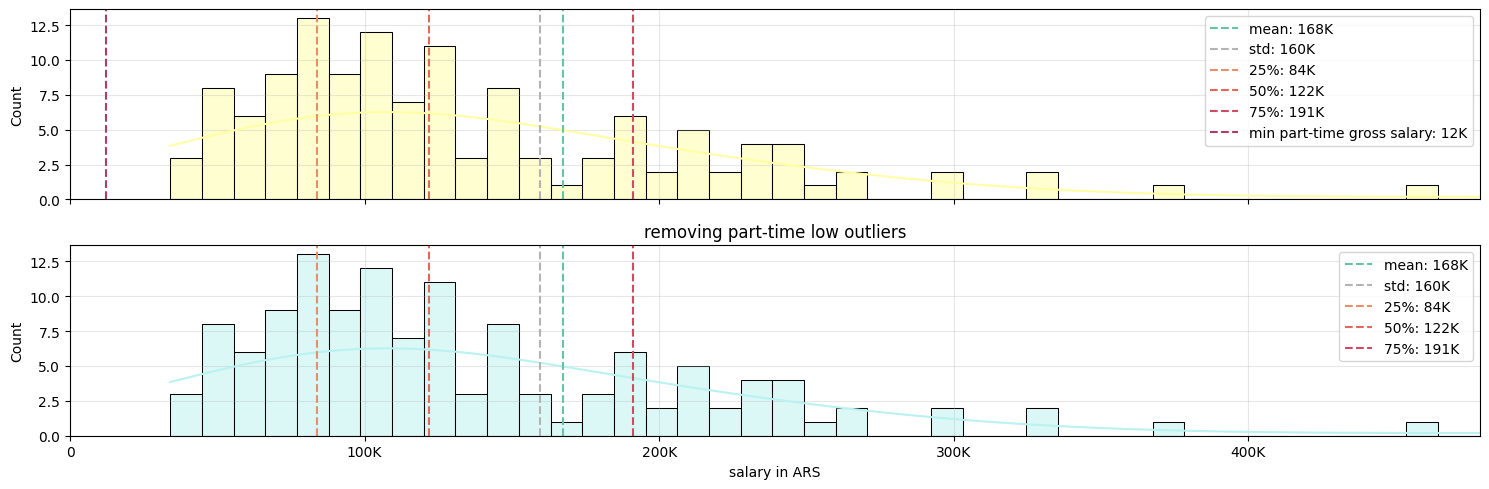

In [79]:
f, ax = plt.subplots(2, 1, figsize=VSUBPLOTS_FIGSIZE, dpi=DPI, sharex=True)
n_bins = 100


for i, df in enumerate([df_part_time, df_part_time_without_low_outliers]):
    df_to_plot = df.monthly_gross_salary
    sns.histplot(df_to_plot,
                 bins=n_bins,
                 ax=ax[i],
                 color=next(MAIN_PALETTE),
                 kde=True)
    
    statistics = df_to_plot.describe(include='all')

    for j, name in enumerate(['mean', 'std']):
        statistic = statistics[name]
        ax[i].axvline(statistic,
                      label=f'{name}: {human_format(statistic)}',
                      color=CATEGORICAL_PALETTE.as_hex()[-j],
                      linestyle='dashed')
        
    for j, st in enumerate(['25%', '50%', '75%']):
        statistic = statistics[st]
        ax[i].axvline(statistic,
                      label=f'{st}: {human_format(statistic)}',
                      color=SECUENTIAL_PALETTE.as_hex()[j],
                      linestyle='dashed')
        
    if i == 0:
        ax[i].axvline(min_part_time_gross_salary,
                      label=f'min part-time gross salary: {human_format(min_part_time_gross_salary)}',
                      color=SECUENTIAL_PALETTE.as_hex()[j+1],
                      linestyle='dashed')
        
    ax[i].xaxis.set_major_formatter(FORMATTER)
    ax[i].grid(alpha=0.3)
    ax[i].legend()

plt.xlim(0, 3 * statistics['std'])
plt.xlabel('salary in ARS')
plt.title('removing part-time low outliers')
plt.tight_layout()

Debido a la complejidad de análisis y comparación de sueldos a lo largo del tiempo en Argentina, por las fluctuaciones en las variables económicas, se trabaja con la conversión a dólar estado unidense dado por un valor *"en el medio"* de los valores medios de las cotizaciones *oficial* y *blue* durante el año 2022.

> A sabiendas de que el dolar oficial no es en la práctica la cotización mayoritariamente empleada, mientras que la cotización blue no está regulada.

In [80]:
def ars_to_usd(ars: float) -> float:
    """
    ARS to USD conversion according to https://dolarhistorico.com/cotizacion-dolar-oficial/2022
    and https://dolarhistorico.com/cotizacion-dolar-blue/2022
    """
    ars_per_usd_blue = (347 + 343)/2
    ars_per_usd_oficial = (184.12 + 175.12)/2
    ars_per_usd = (ars_per_usd_blue + ars_per_usd_oficial) / 2
    return ars / ars_per_usd

In [81]:
df_full_time = df_full_time_without_low_outliers
df_part_time = df_part_time_without_low_outliers

In [82]:
frames = [df_part_time, df_full_time]
df = pd.concat(frames)

In [83]:
# this cell needs to be run manually ! SettingWithCopyWarning does not disappear :'(
df['usd_monthly_gross_salary'] = df.monthly_gross_salary.apply(ars_to_usd)
df['usd_monthly_net_salary'] = df.monthly_net_salary.apply(ars_to_usd)

#### superior

##### full-time

La regla de $n \sigma$, $n \in \mathbb{Z}$ a la derecha del valor medio puede resultar una buena forma de eliminar outliers a la derecha de $\mu$, sin embargo:
- es sabido que un salario en IT puede alcanzar variados y *elevados* valores
- contemplando algunos pocos, pero muy elevados valores, éstos pueden desplazar de manera significativa los estadísticos del dataset (hacia la derecha).

De manera que, teniendo en cuenta que el enfoque propuesto está fuertemente ligado a los **lenguajes de programación** del stack de las personas encuestadas vs sus salarios, se confecciona el siguiente procedimiento para eliminar outliers superiores:

Se fija como referencia de salarios elevados el top de tecnologías mejores pagas en IT de la [encuesta de Stackoverflow 2022](https://survey.stackoverflow.co/2022/):

In [84]:
TOP_TECH_2022_SURVEY = {'Clojure': 106_644, 'Erlang': 103_000, 'F#': 95_526, 'LISP': 95_000, 'Ruby': 93_000,
                         'Elixir': 92_959, 'Scala': 92_780, 'Perl': 90_073, 'Go': 89_204, 'Rust': 87_047,
                         'OCaml': 86_948, 'Groovy': 85_320, 'Crystal': 84_690, 'Objective-C': 83_165,
                         'Bash/Shell': 81_666, 'Haskell': 80_250, 'Fortran': 80_000, 'Lua': 79_568,
                         'Swift': 78_468, 'PowerShell': 78_084, 'Julia': 77_966, 'APL': 75_932, 'COBOL': 75_592,
                         'Assembly': 75_000, 'Python': 71_105, 'Solidity': 70_368, 'TypeScript': 70_276, 'C#': 69_516,
                         'Kotlin': 69_318, 'SQL': 69_108, 'C++': 68_000, 'R': 67_734, 'C': 67_186, 'JavaScript': 65_580,
                         'Java': 64_572, 'SAS': 64_243, 'Delphi': 63_984, 'HTML/CSS': 63_984, 'VBA': 62_328,
                         'MATLAB': 57_588, 'PHP': 50_496, 'Dart': 43_724,}

In [85]:
def salary_in_top_tech(tools: list[str]) -> float:
    """
    Return the max salary value if any tool name is in the top tech tools 2022 survey
    """
    top_tools_salaries = []
    for tool in tools:
        for top_tech in TOP_TECH_2022_SURVEY.keys():
            if tool in top_tech.lower():
                top_tools_salaries.append(TOP_TECH_2022_SURVEY[top_tech] / 12)  # anual to monthly
    if not top_tools_salaries:
        return np.nan
    return max(top_tools_salaries)

Se crea una nueva columna a fin de comparar el máximo salario de tecnologías extraído de la encuesta 2022 de Stackoverflow con los salarios en análisis, así como un ratio entre estos dos últimos, para poder así establecer si se trata de un salario elevado factible o no:

In [86]:
df['mean_salary_in_top_tech'] = df.list_of_tools_programming_languages.apply(salary_in_top_tech)
df['ratio_gross_top_tech'] = df.usd_monthly_gross_salary.div(df.mean_salary_in_top_tech)

In [87]:
df.columns

Index(['work_dedication', 'monthly_gross_salary', 'monthly_net_salary',
       'salary_comparison_last_semester', 'profile_years_experience',
       'tools_programming_languages', 'profile_level_study', 'profile_gender',
       'profile_experience_range', 'list_of_tools_programming_languages',
       'list_of_normalized_languages', 'usd_monthly_gross_salary',
       'usd_monthly_net_salary', 'mean_salary_in_top_tech',
       'ratio_gross_top_tech'],
      dtype='object')

In [88]:
for col in ['usd_monthly_gross_salary', 'usd_monthly_net_salary', 'mean_salary_in_top_tech', 'ratio_gross_top_tech']:
    columns_of_interest.append(col) 

columns_of_interest = list(set(columns_of_interest))

In [89]:
df = df[columns_of_interest]

##### view top full-time salaries

In [90]:
df_part_time = df.groupby('work_dedication').get_group('part-time')
df_full_time = df.groupby('work_dedication').get_group('full-time')

In [91]:
higher_than_mu_mask = df_full_time.monthly_gross_salary > df_full_time.monthly_gross_salary.mean()

df_full_time[
    higher_than_mu_mask
].sort_values(
    by='usd_monthly_gross_salary', ascending=False
)[
    ['usd_monthly_gross_salary', 'list_of_tools_programming_languages', 'mean_salary_in_top_tech', 'ratio_gross_top_tech']
].head(50).style.format(
    {col: human_format for col in ['usd_monthly_gross_salary', 'mean_salary_in_top_tech']},  # '${:,.2f}'},
    precision=1,
).bar(subset=['usd_monthly_gross_salary', 'mean_salary_in_top_tech'], color='green'
     ).applymap(lambda x: 'background-color: red' if x > 1.3 else '', subset=['ratio_gross_top_tech'])

,usd_monthly_gross_salary,list_of_tools_programming_languages,mean_salary_in_top_tech,ratio_gross_top_tech
4507,107K,"['html', 'javascript', 'php', 'python', 'typescript']",6K,18.0
2388,14K,"['bash/shell', 'css', 'html', 'javascript', 'typescript']",7K,2.1
975,13K,['java'],5K,2.3
1369,12K,"['php', 'typescript']",6K,2.1
2842,11K,"['bash/shell', 'javascript', 'terraform']",7K,1.7
4124,11K,"['python', 'scala', 'sql']",8K,1.5
4406,11K,"['go', 'javascript', 'typescript']",7K,1.5
4122,11K,"['php', 'sql']",6K,1.9
1347,11K,"['bash/shell', 'c#', 'css', 'go', 'java', 'python', 'ruby', 'rust', 'sql', 'typescript']",8K,1.4
5229,11K,"['python', 'typescript']",6K,1.8


Se pueden visualizar algunos salarios *elevados* respecto al $\mu$ del dataset, que se condicen con los salarios factibles de referencia, y que:
- aplicando la regla de las desviaciones estandard, se hubiesen descartado como outliers
- conservandolos *(véase salario del index 4507 de 81k usd)* desplazan los estadísticos hacia la derecha

Se descartan entonces las entradas con salarios elevados (por encima de $\mu$), que presentan un ratio respecto a la refencia de **más de 1.3** (dado que los valores de referencia son un "top"):

##### view top full-time and languages

In [92]:
no_fake_gross_high_salary_mask = df_full_time.ratio_gross_top_tech < 1.1

df_full_time_without_fake_high_salaries = df_full_time[no_fake_gross_high_salary_mask]
df_full_time_without_fake_high_salaries.sort_values(
    by='usd_monthly_gross_salary', ascending=False
)[
    ['usd_monthly_gross_salary', 'list_of_tools_programming_languages']
].head(30).style.format(
    {'usd_monthly_gross_salary': human_format},  # '${:,.2f}'},
    precision=1,
).bar(subset=['usd_monthly_gross_salary'], color='green')

,usd_monthly_gross_salary,list_of_tools_programming_languages
3253,10K,"['c', 'c++', 'dart', 'go', 'java', 'javascript', 'python']"
1471,8K,"['bash/shell', 'go', 'javascript', 'python', 'scala', 'sql']"
549,8K,"['bash/shell', 'go', 'python']"
4217,8K,"['go', 'typescript']"
341,8K,"['go', 'python', 'ruby', 'rust', 'typescript']"
3792,8K,"['go', 'ruby', 'typescript']"
3782,8K,"['javascript', 'python', 'scala']"
1454,8K,"['go', 'java', 'typescript']"
3520,8K,"['c#', 'groovy', 'html', 'javascript', 'python', 'sql']"
656,7K,"['groovy', 'python']"


In [93]:
df_full_time.size, df_full_time_without_fake_high_salaries.size

(49860, 48135)

In [94]:
max_full_time_gross_salary = df_full_time_without_fake_high_salaries.usd_monthly_gross_salary.max()

##### plot histograma full-time

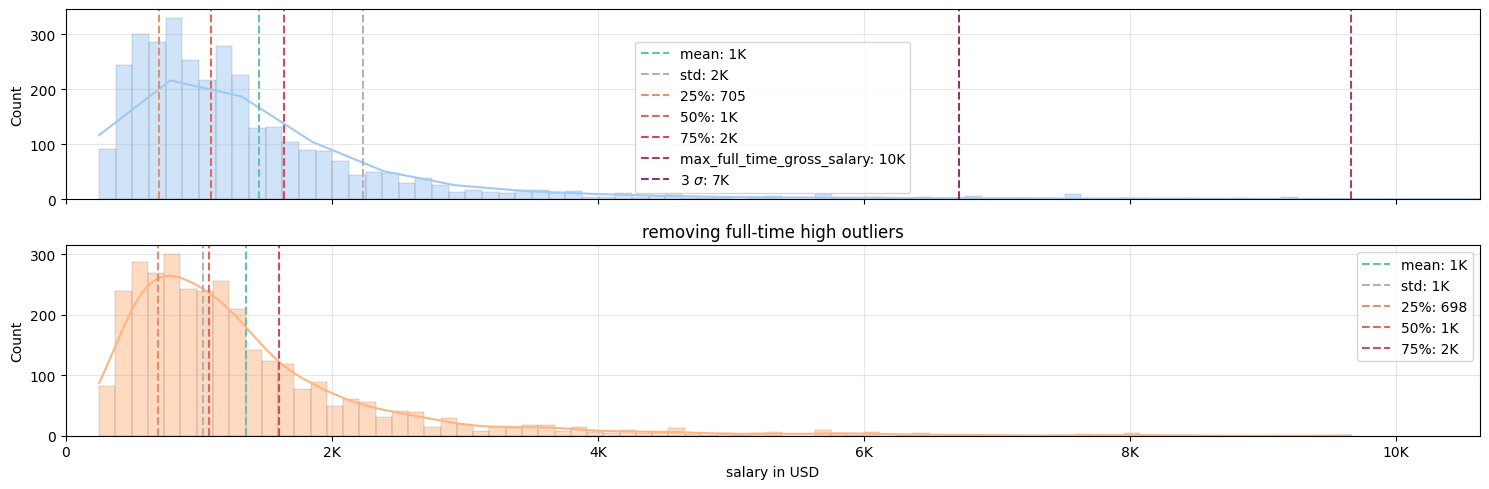

In [95]:
f, ax = plt.subplots(2, 1, figsize=VSUBPLOTS_FIGSIZE, dpi=DPI, sharex=True)

for i, df in enumerate([df_full_time, df_full_time_without_fake_high_salaries]):
    df_to_plot = df.usd_monthly_gross_salary
    sns.histplot(df_to_plot, 
                 ax=ax[i],
                 color=next(MAIN_PALETTE),
                kde=True)
    
    statistics = df_to_plot.describe(include='all')

    for j, name in enumerate(['mean', 'std']):
        statistic = statistics[name]
        ax[i].axvline(statistic,
                      label=f'{name}: {human_format(statistic)}',
                      color=CATEGORICAL_PALETTE.as_hex()[-j],
                      linestyle='dashed')
        
    for j, st in enumerate(['25%', '50%', '75%']):
        statistic = statistics[st]
        ax[i].axvline(statistic,
                      label=f'{st}: {human_format(statistic)}',
                      color=SECUENTIAL_PALETTE.as_hex()[j],
                      linestyle='dashed')
        
    if i == 0:
        ax[i].axvline(max_full_time_gross_salary,
                      label=f'max_full_time_gross_salary: {human_format(max_full_time_gross_salary)}',
                      color=SECUENTIAL_PALETTE.as_hex()[j+1],
                      linestyle='dashed')
        
        three_sigmas = 3 * statistics['std']
        
        ax[i].axvline(three_sigmas,
                  label=f'3 $\sigma$: {human_format(three_sigmas)}',
                  color=SECUENTIAL_PALETTE.as_hex()[-j],
                  linestyle='dashed')
        
    ax[i].xaxis.set_major_formatter(FORMATTER)
    ax[i].grid(alpha=0.3)
    ax[i].legend()

plt.xlim(0, 1.1 * max_full_time_gross_salary)
plt.xlabel('salary in USD')
plt.title('removing full-time high outliers')
plt.tight_layout()

##### part-time


Se determina a qué percentile corresponde la entrada de salario cuyo valor se acerca más al límite superior de outliers antes definido:

In [96]:
distance_to_max_salary = df_full_time.usd_monthly_gross_salary.apply(
    lambda x: (x - max_full_time_gross_salary)
).apply(lambda n: -n if n < 0 else n)
distance_to_max_salary

0      8520.45290
1      6233.08299
2      9206.66387
4      9130.41821
5      7250.96260
          ...    
5348   8520.45290
5351   9244.78670
5352   9206.66387
5355   8787.31272
5356   7944.84007
Name: usd_monthly_gross_salary, Length: 3324, dtype: float64

In [97]:
min_idx = distance_to_max_salary.idxmin()
min_idx, distance_to_max_salary.loc[min_idx]

(3253, 0.0)

In [98]:
df_full_time.usd_monthly_gross_salary.rank(pct=True)

0      0.53730
1      0.94314
2      0.07145
4      0.11793
5      0.88327
         ...  
5348   0.53730
5351   0.05039
5352   0.07145
5355   0.37154
5356   0.77557
Name: usd_monthly_gross_salary, Length: 3324, dtype: float64

In [99]:
max_full_time_salary_percentile = df_full_time.usd_monthly_gross_salary.rank(pct=True).loc[min_idx]
max_full_time_salary_percentile

0.996690734055355

Dado que los datasets presentan la misma naturaleza/comportamiento, ante la incertidumbre de un valor para el límite inferior del rango de outliers para dedicación 'part-time', se aplica el percentil ~$0.9956$ antes calculado:

In [100]:
max_part_time_gross_salary = df_part_time.usd_monthly_gross_salary.quantile(max_full_time_salary_percentile)
max_part_time_gross_salary

3876.6240567179625

##### view top salaries and languages

In [101]:
no_fake_high_salary_mask = df_part_time.usd_monthly_gross_salary < max_part_time_gross_salary
df_part_time_without_fake_high_salaries = df_part_time[no_fake_high_salary_mask]
df_part_time_without_fake_high_salaries.sort_values(
    by='usd_monthly_gross_salary', ascending=False
)[
    ['usd_monthly_gross_salary', 'list_of_tools_programming_languages']
].head(30).style.format(
    {'usd_monthly_gross_salary': human_format},  # '${:,.2f}'},
    precision=1,
).bar(subset=['usd_monthly_gross_salary'], color='green')

,usd_monthly_gross_salary,list_of_tools_programming_languages
513,3K,['html']
3801,3K,"['bash/shell', 'python', 'sql']"
4385,3K,"['.net', 'arduino', 'bash/shell', 'c#', 'html', 'javascript', 'sql']"
1736,2K,"['go', 'html', 'javascript', 'php', 'python']"
4329,2K,"['groovy', 'html', 'java', 'javascript', 'sql']"
1325,2K,['python']
4321,2K,"['bash/shell', 'css', 'dart', 'html', 'javascript', 'matlab', 'python', 'r', 'scala', 'sql', 'typescript']"
796,1K,"['php', 'scala']"
2650,1K,"['javascript', 'php', 'python', 'sql']"
1853,1K,"['css', 'html', 'java', 'javascript', 'typescript']"


In [102]:
df_part_time.size, df_part_time_without_fake_high_salaries.size

(2025, 2010)

##### plot hist part-time

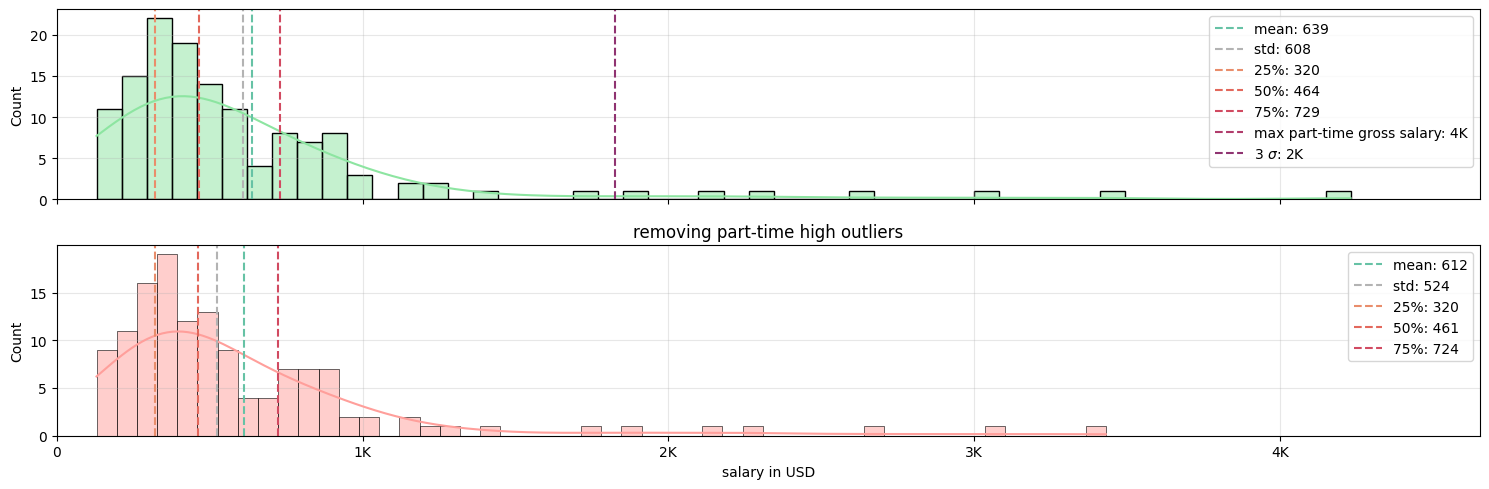

In [103]:
f, ax = plt.subplots(2, 1, figsize=VSUBPLOTS_FIGSIZE, dpi=DPI, sharex=True)
n_bins = 50

for i, df in enumerate([df_part_time, df_part_time_without_fake_high_salaries]):
    df_to_plot = df.usd_monthly_gross_salary
    sns.histplot(df_to_plot,
                 bins=n_bins,
                 ax=ax[i],
                 color=next(MAIN_PALETTE),
                kde=True)
    
    statistics = df_to_plot.describe(include='all')

    for j, name in enumerate(['mean', 'std']):
        statistic = statistics[name]
        ax[i].axvline(statistic,
                      label=f'{name}: {human_format(statistic)}',
                      color=CATEGORICAL_PALETTE.as_hex()[-j],
                      linestyle='dashed')
        
    for j, st in enumerate(['25%', '50%', '75%']):
        statistic = statistics[st]
        ax[i].axvline(statistic,
                      label=f'{st}: {human_format(statistic)}',
                      color=SECUENTIAL_PALETTE.as_hex()[j],
                      linestyle='dashed')
        
    if i == 0:
        ax[i].axvline(min_part_time_gross_salary,
                      label=f'max part-time gross salary: {human_format(max_part_time_gross_salary)}',
                      color=SECUENTIAL_PALETTE.as_hex()[j+1],
                      linestyle='dashed')
        
        three_sigmas = 3 * statistics['std']
        
        ax[i].axvline(three_sigmas,
                  label=f'3 $\sigma$: {human_format(three_sigmas)}',
                  color=SECUENTIAL_PALETTE.as_hex()[-j],
                  linestyle='dashed')
        
    ax[i].xaxis.set_major_formatter(FORMATTER)
    ax[i].grid(alpha=0.3)
    ax[i].legend()

plt.xlim(0, 1.1 * df_part_time.usd_monthly_gross_salary.max())
plt.xlabel('salary in USD')
plt.title('removing part-time high outliers')
plt.tight_layout()

Quedan así definidos los datasets para su visualización y análisis

In [104]:
df_part_time.columns

Index(['mean_salary_in_top_tech', 'profile_years_experience',
       'monthly_net_salary', 'list_of_tools_programming_languages',
       'work_dedication', 'usd_monthly_net_salary', 'profile_level_study',
       'ratio_gross_top_tech', 'list_of_normalized_languages',
       'tools_programming_languages', 'usd_monthly_gross_salary',
       'salary_comparison_last_semester', 'profile_gender',
       'profile_experience_range', 'monthly_gross_salary'],
      dtype='object')

In [105]:
df_part_time = df_part_time_without_fake_high_salaries
df_full_time = df_full_time_without_fake_high_salaries

In [106]:
frames = [df_part_time, df_full_time]
df = pd.concat(frames)

### Salario bruto vs neto

#### plot reg gross vs net salaries

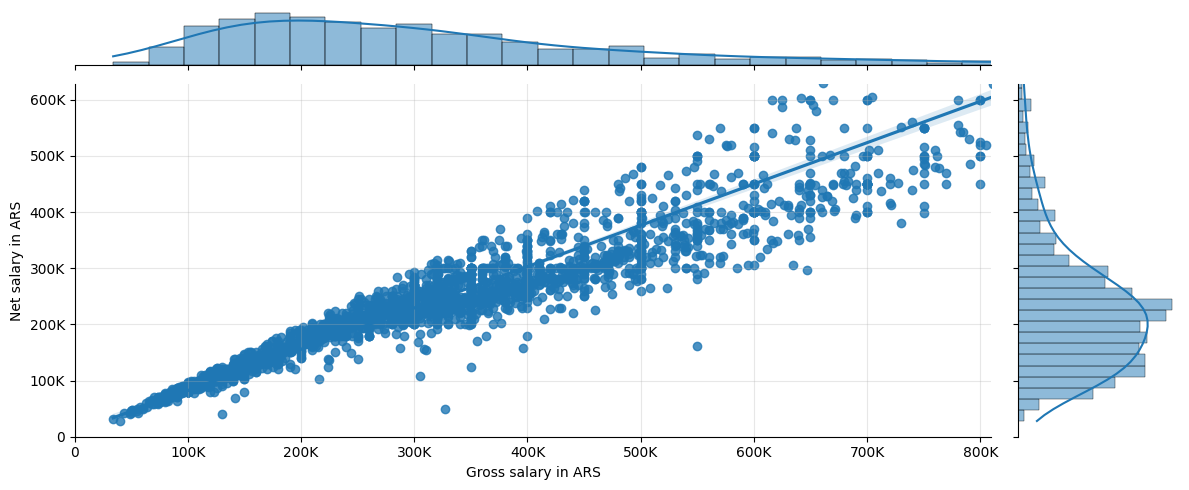

In [117]:
sns.jointplot(x='monthly_gross_salary', y='monthly_net_salary', data=df, kind='reg')

ax = plt.gca()

ax.xaxis.set_major_formatter(FORMATTER)
ax.yaxis.set_major_formatter(FORMATTER)

ax.grid(alpha=0.3)
ax.figure.set_size_inches(FIGSIZE)

plt.xlim(0, 3 * df.monthly_gross_salary.std())
plt.ylim(0, 3 * df.monthly_net_salary.std())
plt.xlabel('Gross salary in ARS')
plt.ylabel('Net salary in ARS')

plt.tight_layout()

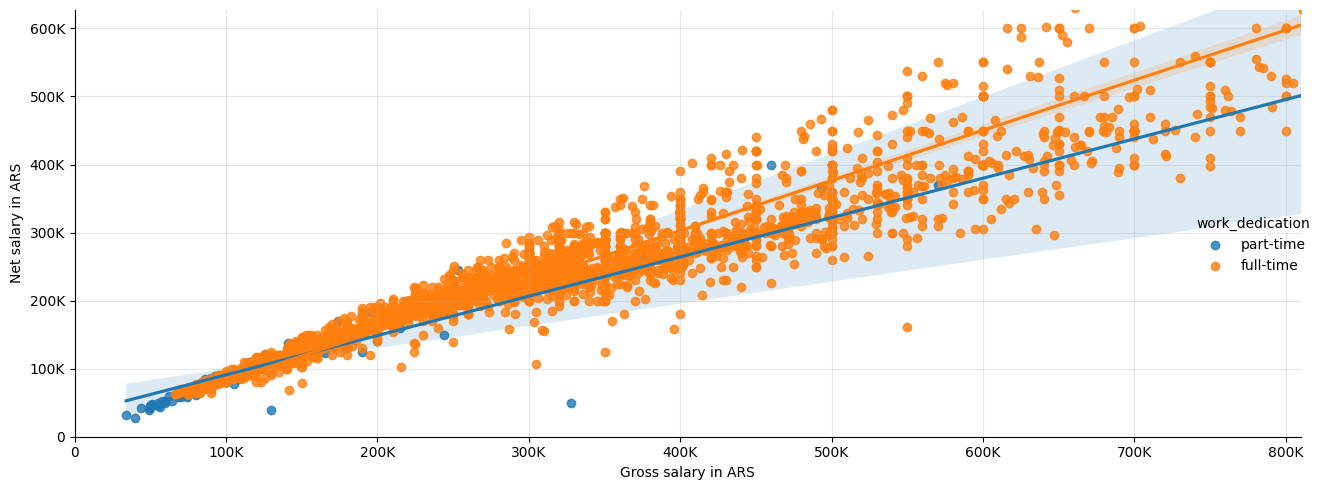

In [118]:
sns.lmplot(x='monthly_gross_salary',
           y='monthly_net_salary',
           hue='work_dedication',
           data=df, aspect=FIGSIZE[0] / FIGSIZE[1],)

ax = plt.gca()

ax.xaxis.set_major_formatter(FORMATTER)
ax.yaxis.set_major_formatter(FORMATTER)

ax.grid(alpha=0.3)


plt.xlim(0, 3 * df.monthly_gross_salary.std())
plt.ylim(0, 3 * df.monthly_net_salary.std())

plt.xlabel('Gross salary in ARS')
plt.ylabel('Net salary in ARS')

plt.tight_layout()

- Habiendo ajustado las dos columnas de interés a un modelo lineal, se observa que, *para la mayoría de los valores*, **existe una relación lineal** entre el salario bruto y neto del dataset.
- Se siguen observando datos alejados del modelo.
- Se observan valores para salario neto por debajo del mínimo vital y móvil (outliers).
- El ratio entre las variables de interés aumenta a medida que aumenta el valor de salario bruto.
- Dicha relación se comporta diferente (se observa una pendiente más pronunciada) para la sub-población de part-times.

Sólo algunas de los descuentos y deducciones que se ven involucrados en el cálculo del sueldo bruto al neto son:
    
- Aportes jubilatorios *(en diferentes porcentajes)*
- Aportes a obra social o medicina pre-paga *(en diferentes porcentajes)*
- Aportes a sindicato *(en diferentes porcentajes)*
- Impuesto a las ganancias
- Deducciones familiares
    - Matrimonio
    - Hijos *(diferente por cantidad de hijos, para hijo con discapacidad)*
- Deducción por alquiler *(diferentes porcentajes)*
- Seguro de vida *(diferentes porcentajes)*
- Bienes inmuebles *(diferentes porcentajes)*
- Zona (desfavorable, patagónico)

Dado que no se cuenta con información al respecto en el dataset, y estimar un valor sería complejo e impreciso,
**se opta por analizar el salario BRUTO para los datos de interés**.

## view preprocessed dataset

In [112]:
COLOR_BY_EXP_RANGE = {}

for i, years_range in enumerate(df.profile_experience_range.unique()):
    COLOR_BY_EXP_RANGE[years_range] = SECUENTIAL_PALETTE.as_hex()[i]
    
def get_color_by_exp_range(years_range):
    try:
        return COLOR_BY_EXP_RANGE[years_range]
    except KeyError:
        return ''

In [113]:
highlight_color = PASTEL_PALETTE.as_hex()[0]

df.sample(50).style.format(
    {col: human_format for col in ['monthly_gross_salary', 'monthly_net_salary', 'usd_monthly_gross_salary', 'usd_monthly_net_salary']},
    precision=1,
    na_rep='missing',
).highlight_null(
    color='gray'
).bar(subset=['monthly_gross_salary', 'usd_monthly_gross_salary', 'usd_monthly_net_salary', 'salary_comparison_last_semester'],
      color='green'
).applymap(
    lambda v: f'background-color: {CATEGORICAL_PALETTE.as_hex()[0]};' if v == 'part-time' else f'background-color: {CATEGORICAL_PALETTE.as_hex()[1]};',
    subset=['work_dedication']
).applymap(
    lambda v: f'background-color: {get_color_by_exp_range(v)};',
    subset=['profile_experience_range']
).applymap(
    lambda v: f'background-color: {highlight_color};' if v and salary_in_top_tech(v) else None,
    subset=['list_of_tools_programming_languages']
)

,mean_salary_in_top_tech,profile_years_experience,monthly_net_salary,list_of_tools_programming_languages,work_dedication,usd_monthly_net_salary,profile_level_study,ratio_gross_top_tech,list_of_normalized_languages,tools_programming_languages,usd_monthly_gross_salary,salary_comparison_last_semester,profile_gender,profile_experience_range,monthly_gross_salary
3366,6805.5,4.0,164K,"['.net', 'bash/shell', 'css', 'html', 'javascript', 'php', 'sql', 'typescript']",full-time,625,missing,0.1,"['.net', 'bash/shell', 'css', 'html', 'javascript', 'php', 'sql', 'typescript']",".NET, Bash/Shell, CSS, HTML, Javascript, PHP, SQL, TypeScript",721,1,varon cis,3-5,189K
1348,5925.4,25.0,355K,"['.net', 'c#', 'css', 'java', 'javascript', 'python', 'sql', 'typescript']",full-time,1K,missing,0.3,"['.net', 'c#', 'css', 'java', 'javascript', 'python', 'sql', 'typescript']",".NET, C#, CSS, Java, Javascript, Python, SQL, TypeScript",2K,3,varon cis,10+,495K
1128,7731.7,0.0,115K,"['bash/shell', 'python', 'scala', 'pyspark']",full-time,438,missing,0.1,"['bash/shell', 'python', 'scala']","Bash/Shell, Python, Scala, Pyspark",610,3,varon cis,0-1,160K
3115,5793.0,2.0,125K,"['.net', 'c#', 'css', 'html', 'javascript', 'php', 'sql']",full-time,477,missing,0.1,"['.net', 'c#', 'css', 'html', 'javascript', 'php', 'sql']",".NET, C#, CSS, HTML, Javascript, PHP, SQL",579,1,varon cis,1-2,152K
3299,5793.0,4.0,236K,"['.net', 'c#']",full-time,900,missing,0.2,"['.net', 'c#']",".NET, C#",1K,2,varon cis,3-5,315K
5115,6299.3,24.0,280K,"['.net', 'arduino', 'c#', 'cobol', 'css', 'html', 'javascript', 'php', 'sql', 'typescript', 'vba']",full-time,1K,Universitario,0.2,"['.net', 'arduino', 'c#', 'cobol', 'css', 'html', 'javascript', 'php', 'sql', 'typescript', 'vba']",".NET, Arduino, C#, COBOL, CSS, HTML, Javascript, PHP, SQL, TypeScript, VBA",1K,3,varon cis,10+,340K
4147,5925.4,13.0,265K,"['java', 'python']",full-time,1K,missing,0.2,"['java', 'python']","Java, Python",1K,3,varon cis,10+,350K
904,5856.3,2.0,190K,"['php', 'sql', 'typescript']",part-time,724,Universitario,0.1,"['php', 'sql', 'typescript']","PHP, SQL, TypeScript",877,3,varon cis,1-2,230K
2525,5465.0,1.0,114K,['java'],full-time,437,Universitario,0.1,['java'],Java,526,3,mujer cis,1-2,138K
5098,5465.0,5.0,216K,"['css', 'html', 'javascript']",full-time,823,missing,0.2,"['css', 'html', 'javascript']","CSS, HTML, Javascript",1K,3,varon cis,3-5,312K


In [114]:
df = df[columns_of_interest]

In [115]:
df.to_csv('preprocessed_salaries_dataset.csv', index=False)